In [1]:
!pip install geopandas
    

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/9d/66/ddb1c74c06c858ddbe889c68fea177d1d9c711af553d355417bdef8eaf17/pyogrio-0.9.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/79/95/eb68113c5b5737c342bde1bab92705dabe69c16299c5a122616e50f1fbd6/pyproj-3.6.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/ec/1b/092fff53cbeced411eed2717592e31cadd3e52f0ebaba5f2df3f34913f96/shapely-2.0.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/323.6 kB ? eta -:--:--
   --------

In [3]:
pip install folium

  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for branca>=0.6.0 from https://files.pythonhosted.org/packages/75/ca/6074ab4a04dd1a503201c18091b3426f3709670115fae316907a97f98d75/branca-0.7.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ----------- ---------------------------- 30.7/108.4 kB ? eta -:--:--
   -------------- ------------------------ 41.0/108.4 kB 393.8 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/108.4 kB 409.6 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/108.4 kB 393.8 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 525.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
import plotly.express as px
     

In [5]:
df=pd.read_csv('crime_by_state.csv')

In [6]:
df

STATE/UT  Year  Murder  Assault on women  \
0       ANDHRA PRADESH  2001      45                69   
1       ANDHRA PRADESH  2002      60                98   
2       ANDHRA PRADESH  2003      33                79   
3       ANDHRA PRADESH  2004      39                66   
4       ANDHRA PRADESH  2005      37                74   
..                 ...   ...     ...               ...   
451  TOTAL (ALL-INDIA)  2008     622              1453   
452  TOTAL (ALL-INDIA)  2009     629              1350   
453  TOTAL (ALL-INDIA)  2010     572              1350   
454  TOTAL (ALL-INDIA)  2011     673              1557   
455  TOTAL (ALL-INDIA)  2012     651              1576   

     Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                          22        3        2      6   518   
1                          18        0        4     12   568   
2                          27        1       15      4   615   
3                          28        0        7     20   474   
4                          21        0        0      9   459   
..                        ...      ...      ...    ...   ...   
451                       477       50       81    224  4134   
452                       511       42       67    195  4322   
453                       510       41       75    150  4344   
454                       616       36       54    169  4247   
455                       490       27       40    214  3855   

     Prevention of atrocities (POA) Act  Protection of Civil Rights (PCR) Act  \
0                                   950                                   312   
1                                   830                                   459   
2                                  1234                                   165   
3                                  1319                                    68   
4                                  1244                                    61   
..                                  ...                                   ...   
451                               11465                                   279   
452                               11037                                   168   
453                               10419                                   143   
454                               11342                                    67   
455                               12576                                    62   

     Other Crimes Against SCs  
0                        1006  
1                        1336  
2                        1386  
3                        1234  
4                        1212  
..                        ...  
451                     14645  
452                     15091  
453                     15039  
454                     14958  
455                     14164  

[456 rows x 12 columns]

In [9]:
droplist = ['TOTAL (ALL-INDIA)','TOTAL (UTs)','TOTAL (STATES)']
print(df.shape)
df = df[~df['STATE/UT'].isin(droplist)]
print(df.shape)

(456, 12)
(420, 12)


In [10]:
df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY'], dtype=object)

In [12]:
df.isna().sum()

STATE/UT                                0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [13]:
df.drop(columns='Year',axis=1).describe()

Murder  Assault on women  Kidnapping and Abduction     Dacoity  \
count  420.000000        420.000000                420.000000  420.000000   
mean    18.809524         37.897619                 11.138095    0.940476   
std     52.543442         79.435608                 34.946327    2.703976   
min      0.000000          0.000000                  0.000000    0.000000   
25%      0.000000          0.000000                  0.000000    0.000000   
50%      1.000000          3.000000                  0.000000    0.000000   
75%     14.000000         34.250000                  8.000000    0.000000   
max    423.000000        412.000000                363.000000   22.000000   

          Robbery       Arson         Hurt  \
count  420.000000  420.000000   420.000000   
mean     2.269048    6.469048   117.033333   
std      6.100314   15.771988   206.612233   
min      0.000000    0.000000     0.000000   
25%      0.000000    0.000000     0.000000   
50%      0.000000    0.000000     3.500000   
75%      1.000000    5.000000   148.250000   
max     83.000000  178.000000  1252.000000   

       Prevention of atrocities (POA) Act  \
count                          420.000000   
mean                           296.566667   
std                            636.605911   
min                              0.000000   
25%                              0.000000   
50%                              8.000000   
75%                            260.250000   
max                           4885.000000   

       Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  
count                            420.000000                420.000000  
mean                              10.166667                380.219048  
std                               35.968971                864.165129  
min                                0.000000                  0.000000  
25%                                0.000000                  0.000000  
50%                                0.000000                  6.000000  
75%                                2.000000                280.000000  
max                              459.000000               4771.000000

In [14]:
len(list(df['STATE/UT'].unique()))

35

In [15]:
df['STATE/UT'].value_counts()

ANDHRA PRADESH       12
UTTARAKHAND          12
PUNJAB               12
RAJASTHAN            12
SIKKIM               12
TAMIL NADU           12
TRIPURA              12
UTTAR PRADESH        12
WEST BENGAL          12
NAGALAND             12
A & N ISLANDS        12
CHANDIGARH           12
D & N HAVELI         12
DAMAN & DIU          12
DELHI                12
LAKSHADWEEP          12
ODISHA               12
MIZORAM              12
ARUNACHAL PRADESH    12
HIMACHAL PRADESH     12
ASSAM                12
BIHAR                12
CHHATTISGARH         12
GOA                  12
GUJARAT              12
HARYANA              12
JAMMU & KASHMIR      12
MEGHALAYA            12
JHARKHAND            12
KARNATAKA            12
KERALA               12
MADHYA PRADESH       12
MAHARASHTRA          12
MANIPUR              12
PUDUCHERRY           12
Name: STATE/UT, dtype: int64

In [16]:
df.min()

STATE/UT                                A & N ISLANDS
Year                                             2001
Murder                                              0
Assault on women                                    0
Kidnapping and Abduction                            0
Dacoity                                             0
Robbery                                             0
Arson                                               0
Hurt                                                0
Prevention of atrocities (POA) Act                  0
Protection of Civil Rights (PCR) Act                0
Other Crimes Against SCs                            0
dtype: object

In [17]:
df.max()

STATE/UT                                WEST BENGAL
Year                                           2012
Murder                                          423
Assault on women                                412
Kidnapping and Abduction                        363
Dacoity                                          22
Robbery                                          83
Arson                                           178
Hurt                                           1252
Prevention of atrocities (POA) Act             4885
Protection of Civil Rights (PCR) Act            459
Other Crimes Against SCs                       4771
dtype: object

In [19]:

df2 = df.drop('Year',axis=1)
df3 = df.drop('STATE/UT',axis=1)
df['Totalcrime'] = df3.sum(axis=1)
df['Totalcrime']
df.head()
df2.head()
df3.head()
df.head()

C:\Users\chakr\AppData\Local\Temp\ipykernel_20004\3533713003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Totalcrime'] = df3.sum(axis=1)


STATE/UT  Year  Murder  Assault on women  Kidnapping and Abduction  \
0  ANDHRA PRADESH  2001      45                69                        22   
1  ANDHRA PRADESH  2002      60                98                        18   
2  ANDHRA PRADESH  2003      33                79                        27   
3  ANDHRA PRADESH  2004      39                66                        28   
4  ANDHRA PRADESH  2005      37                74                        21   

   Dacoity  Robbery  Arson  Hurt  Prevention of atrocities (POA) Act  \
0        3        2      6   518                                 950   
1        0        4     12   568                                 830   
2        1       15      4   615                                1234   
3        0        7     20   474                                1319   
4        0        0      9   459                                1244   

   Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  Totalcrime  
0                                   312                      1006        9868  
1                                   459                      1336       10774  
2                                   165                      1386       11124  
3                                    68                      1234       10518  
4                                    61                      1212       10244

In [20]:

for i in df3:
  plt.figure(figsize=(8,10))
  df_main = df[['STATE/UT','Year',i]].pivot_table(values=i,index='STATE/UT',columns='Year',aggfunc='sum')
  sns.heatmap(df_main,annot=True,fmt='.0f',cmap='Blues')
  plt.title(i)
  plt.xlabel('Year')
  plt.ylabel('States')
  plt.show()

ValueError: Grouper for 'Year' not 1-dimensional

<Figure size 800x1000 with 0 Axes>

In [21]:

grouped_data_year = df.groupby("Year").sum().drop('Totalcrime',axis=1)
grouped_data_year

C:\Users\chakr\AppData\Local\Temp\ipykernel_20004\1698535426.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_year = df.groupby("Year").sum().drop('Totalcrime',axis=1)


Murder  Assault on women  Kidnapping and Abduction  Dacoity  Robbery  \
Year                                                                         
2001     763              1316                       400       41      133   
2002     739              1331                       319       29      105   
2003     581              1089                       232       24       70   
2004     654              1157                       253       26       72   
2005     669              1172                       258       26       80   
2006     673              1217                       280       30       90   
2007     674              1349                       332       23       86   
2008     622              1453                       477       50       81   
2009     629              1350                       511       42       67   
2010     572              1350                       510       41       75   
2011     673              1557                       616       36       54   
2012     651              1576                       490       27       40   

      Arson  Hurt  Prevention of atrocities (POA) Act  \
Year                                                    
2001    354  4547                               13113   
2002    322  4491                               10770   
2003    204  3969                                8048   
2004    211  3824                                8891   
2005    210  3847                                8497   
2006    226  3760                                8581   
2007    238  3814                                9819   
2008    224  4134                               11465   
2009    195  4322                               11037   
2010    150  4344                               10419   
2011    169  4247                               11342   
2012    214  3855                               12576   

      Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  
Year                                                                  
2001                                   633                     12201  
2002                                  1018                     14383  
2003                                   634                     11401  
2004                                   364                     11435  
2005                                   291                     11077  
2006                                   405                     11808  
2007                                   206                     13490  
2008                                   279                     14645  
2009                                   168                     15091  
2010                                   143                     15039  
2011                                    67                     14958  
2012                                    62                     14164

In [22]:

grouped_data_state = df2.groupby('STATE/UT').sum()
grouped_data_state['Totalcrime'] = grouped_data_state.sum(axis=1) 
grouped_data_state.sort_values('Totalcrime',ascending=False)

Murder  Assault on women  Kidnapping and Abduction  \
STATE/UT                                                                
UTTAR PRADESH        3577              3625                      2225   
RAJASTHAN             630              1909                       365   
MADHYA PRADESH       1062              4107                       510   
ANDHRA PRADESH        556              1110                       238   
BIHAR                 286               284                       127   
KARNATAKA             302               329                        70   
TAMIL NADU            352               259                        62   
ODISHA                158               574                       135   
GUJARAT               204               325                       301   
MAHARASHTRA           243               979                       151   
KERALA                 36               782                        23   
CHHATTISGARH          117               661                        43   
JHARKHAND              65               129                        44   
HARYANA               128               447                       221   
PUNJAB                 32               115                        18   
HIMACHAL PRADESH       10                93                         2   
UTTARAKHAND            50                65                        27   
ASSAM                  57                57                        96   
WEST BENGAL             2                19                         1   
DELHI                   1                 0                         0   
PUDUCHERRY              4                 0                         1   
TRIPURA                 4                15                         6   
SIKKIM                  8                17                         8   
NAGALAND               12                 6                         1   
JAMMU & KASHMIR         3                 7                         0   
GOA                     0                 1                         0   
CHANDIGARH              0                 2                         0   
D & N HAVELI            0                 0                         2   
DAMAN & DIU             0                 0                         0   
MIZORAM                 0                 0                         1   
ARUNACHAL PRADESH       1                 0                         0   
LAKSHADWEEP             0                 0                         0   
MANIPUR                 0                 0                         0   
MEGHALAYA               0                 0                         0   
A & N ISLANDS           0                 0                         0   

                   Dacoity  Robbery  Arson  Hurt  \
STATE/UT                                           
UTTAR PRADESH           55      214    715  4889   
RAJASTHAN                1       33    481  5984   
MADHYA PRADESH           9       96    446  9993   
ANDHRA PRADESH           9       39    136  7248   
BIHAR                   29       77    309  4524   
KARNATAKA               17       19     20  1939   
TAMIL NADU               5       15     89  2269   
ODISHA                  18       67    170  3281   
GUJARAT                 85      214    115  3271   
MAHARASHTRA            122       97    109   766   
KERALA                   5        9     21  2023   
CHHATTISGARH             1       13     17   743   
JHARKHAND               16        2     22   912   
HARYANA                  1       10     32   524   
PUNJAB                   0        1      0   134   
HIMACHAL PRADESH         8        6      1    11   
UTTARAKHAND              0        1      4   160   
ASSAM                   14       33     25   341   
WEST BENGAL              0        0      1    26   
DELHI                    0        0      0     0   
PUDUCHERRY               0        0      0     5   
TRIPURA                  0        1      1    64   
SIKKIM                   0        4      2    39   
NAGALAND         

C:\Users\chakr\AppData\Local\Temp\ipykernel_20004\1592780835.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)


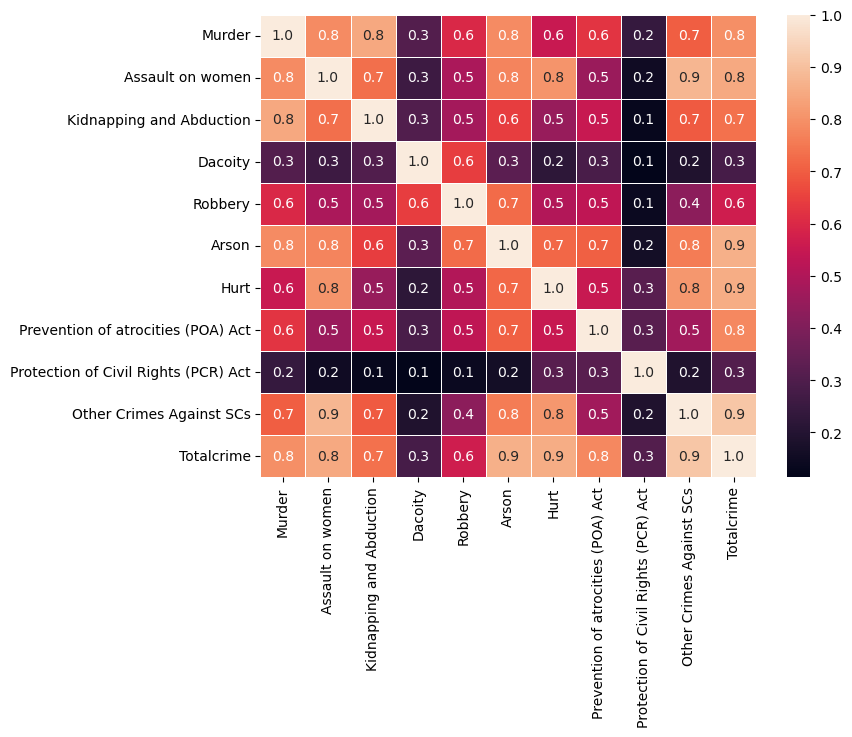

In [23]:

f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(df2.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

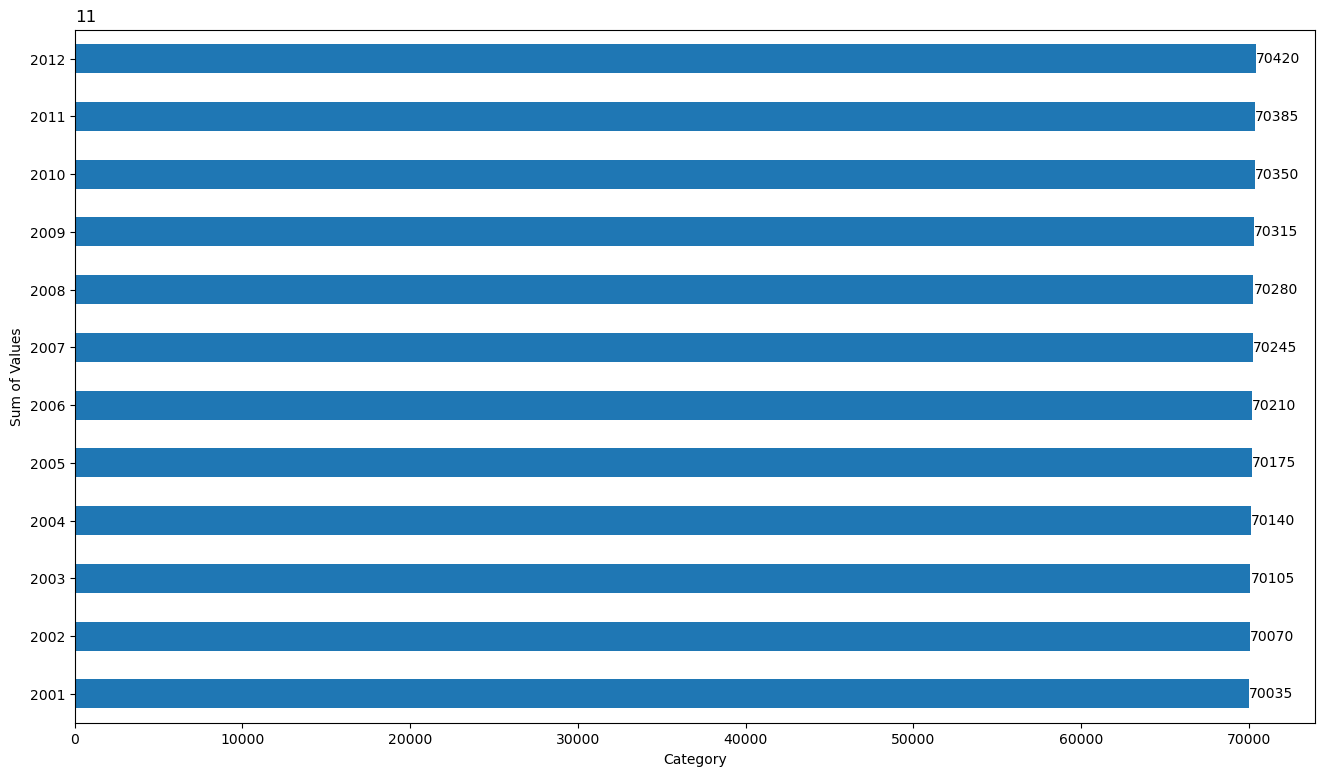

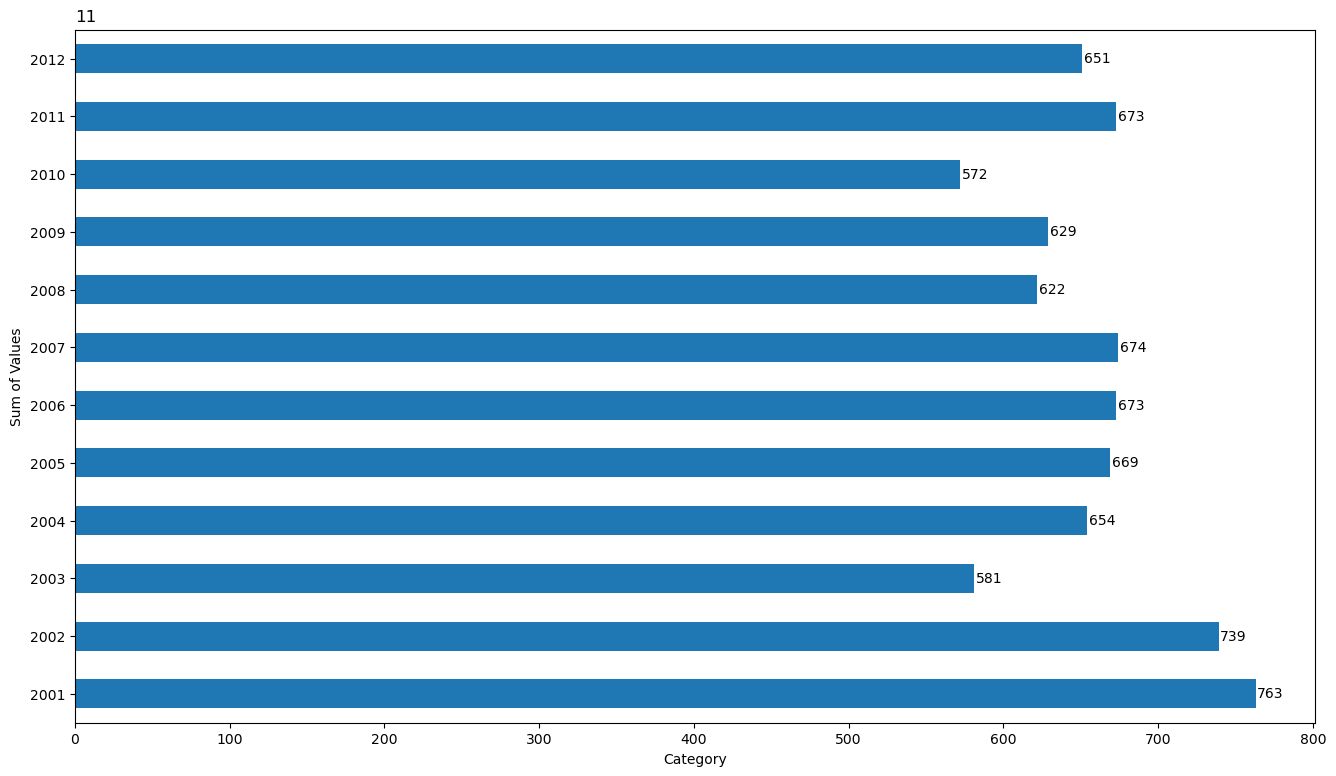

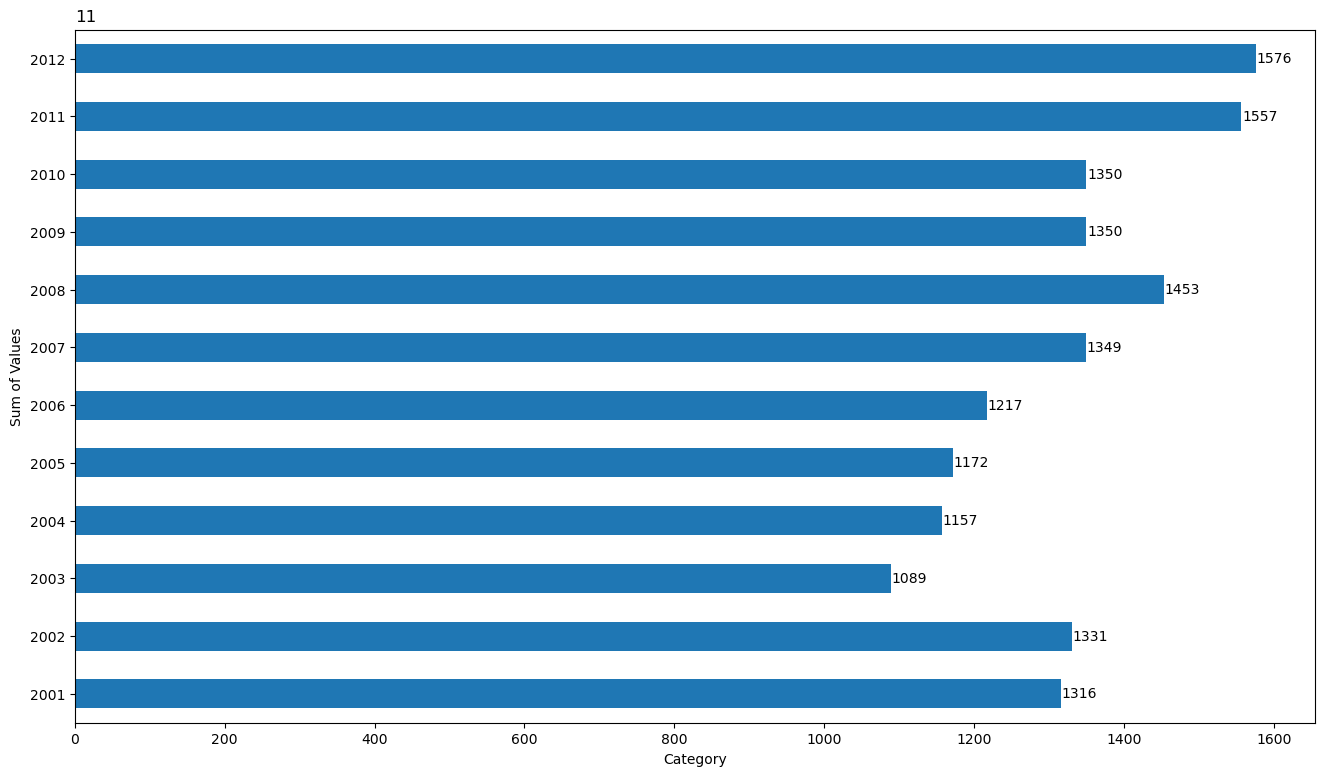

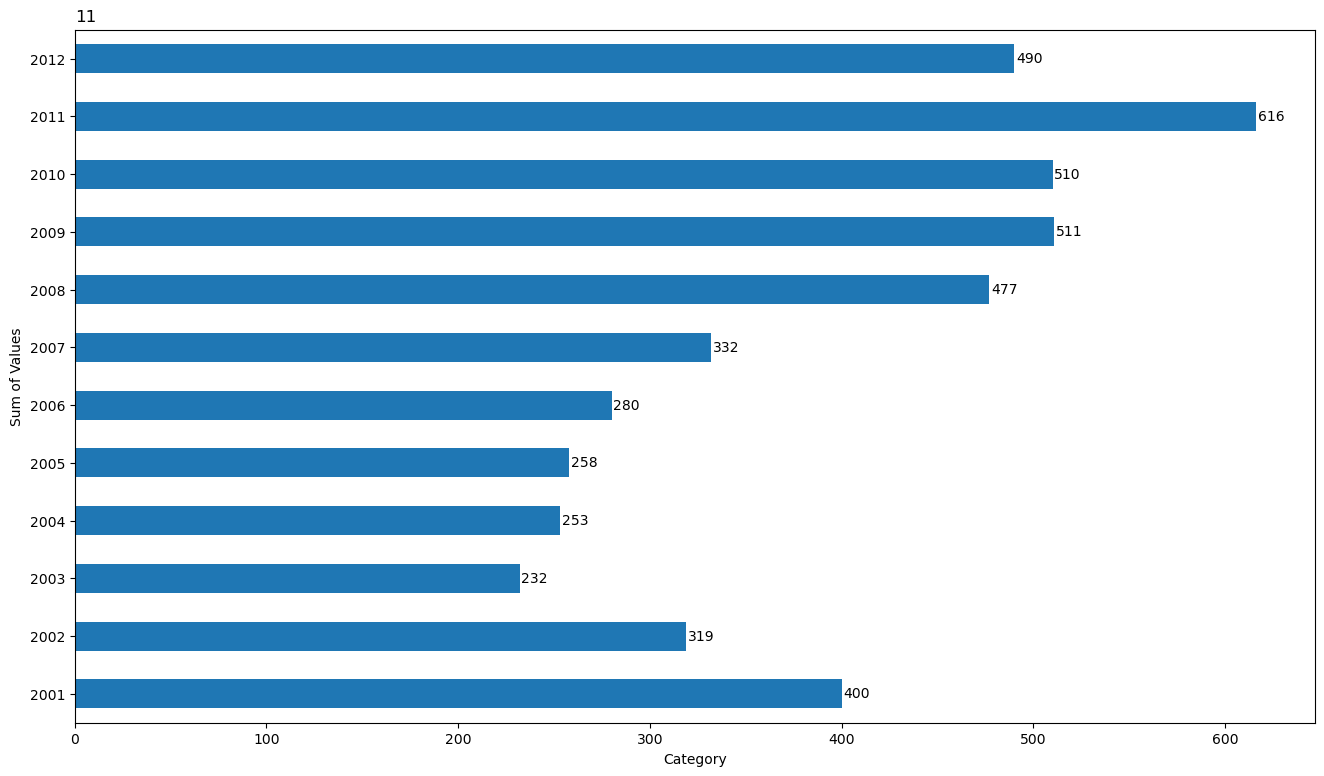

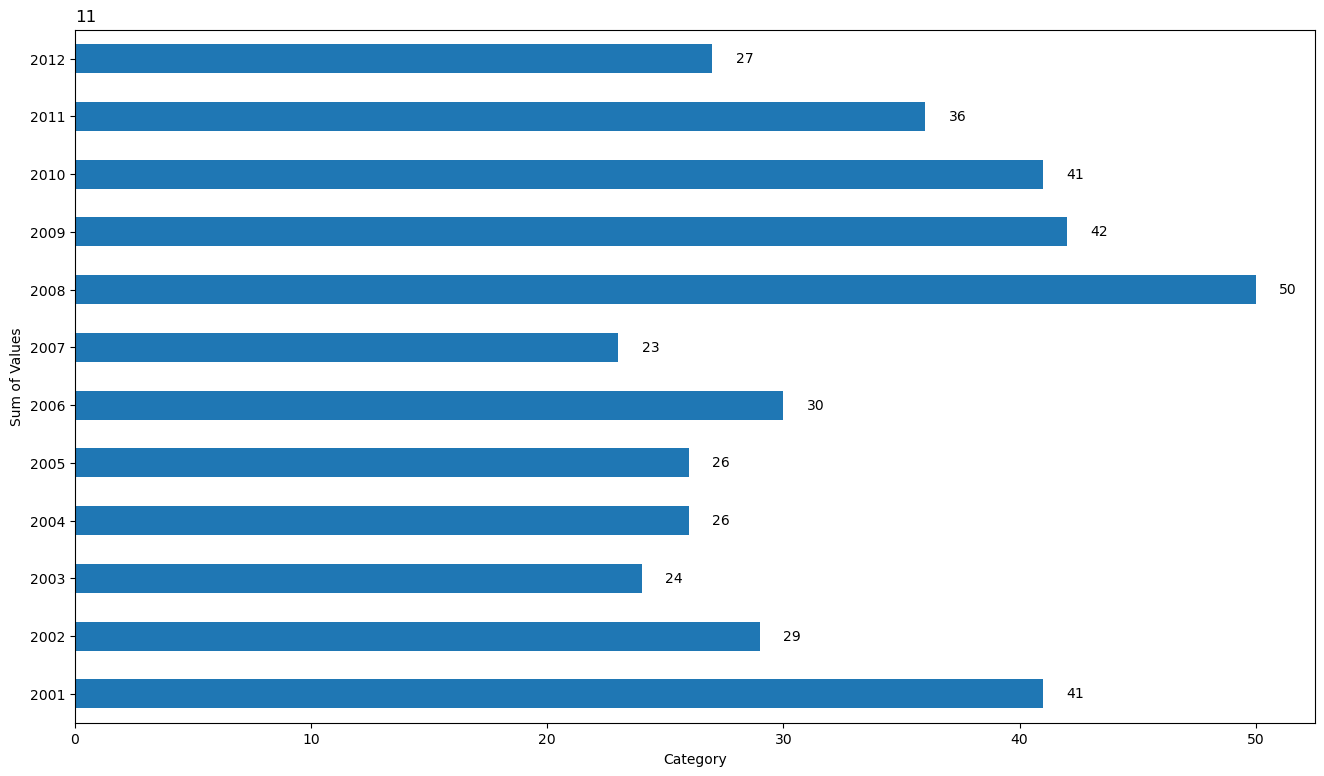

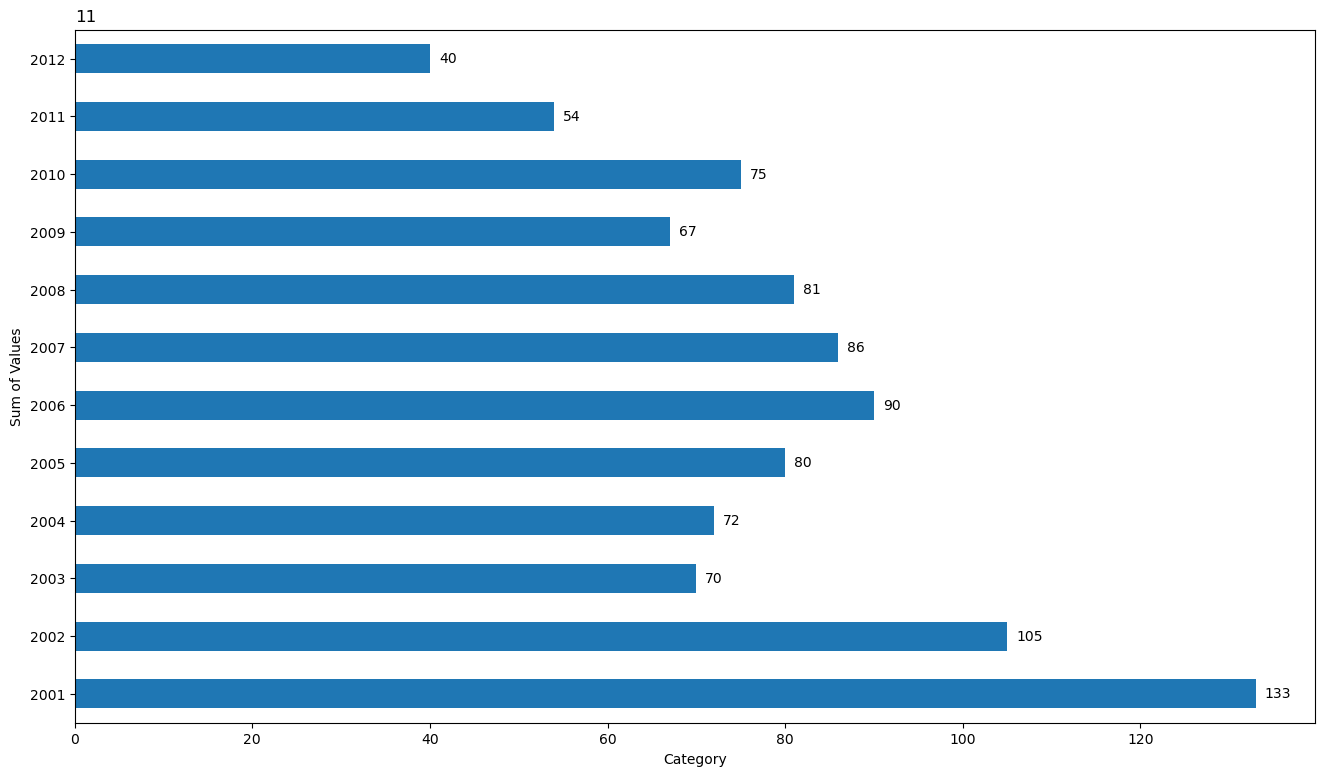

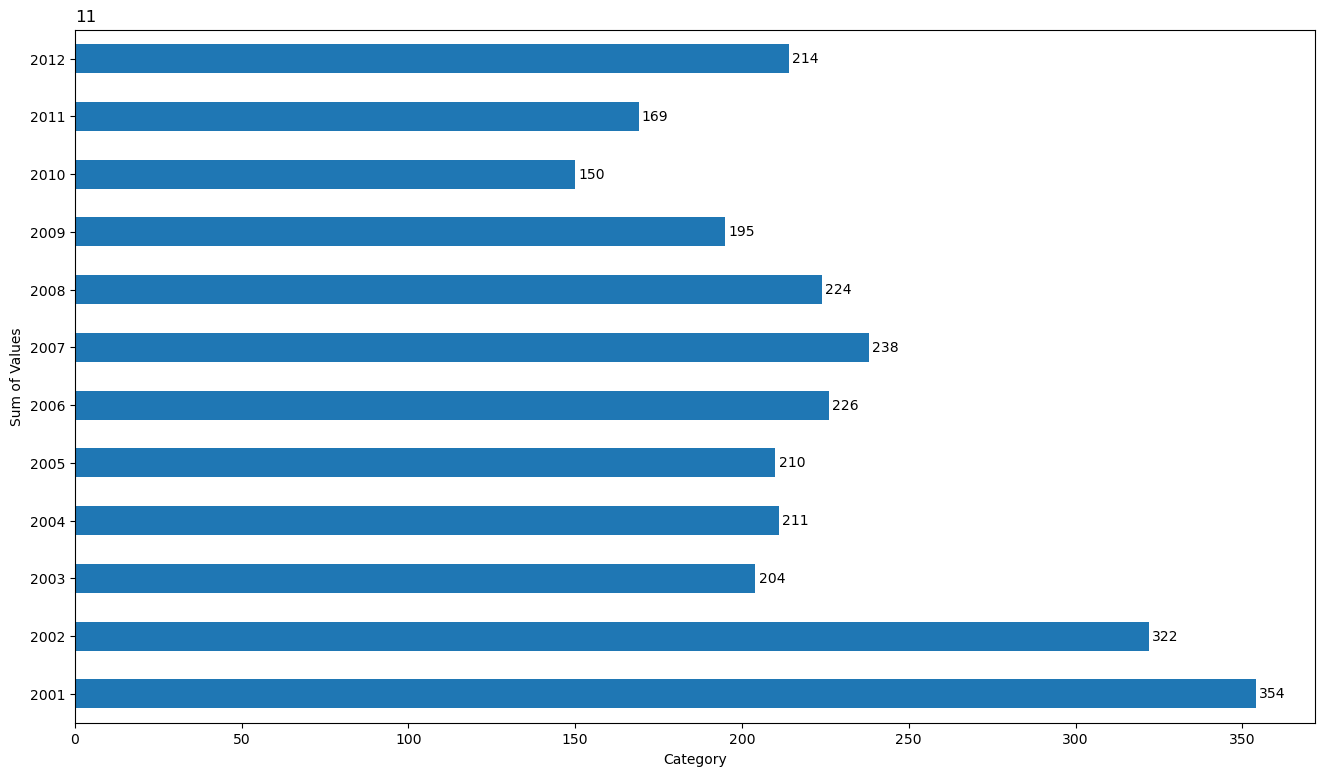

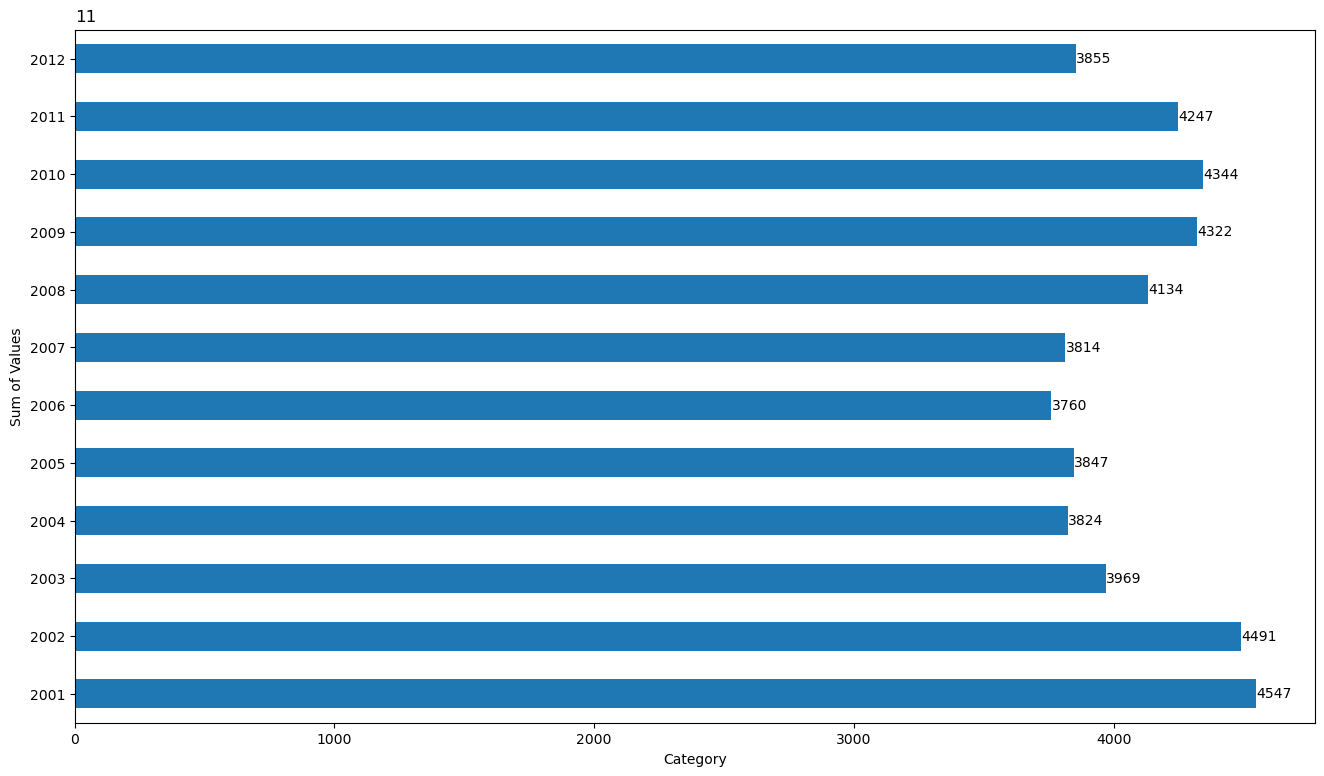

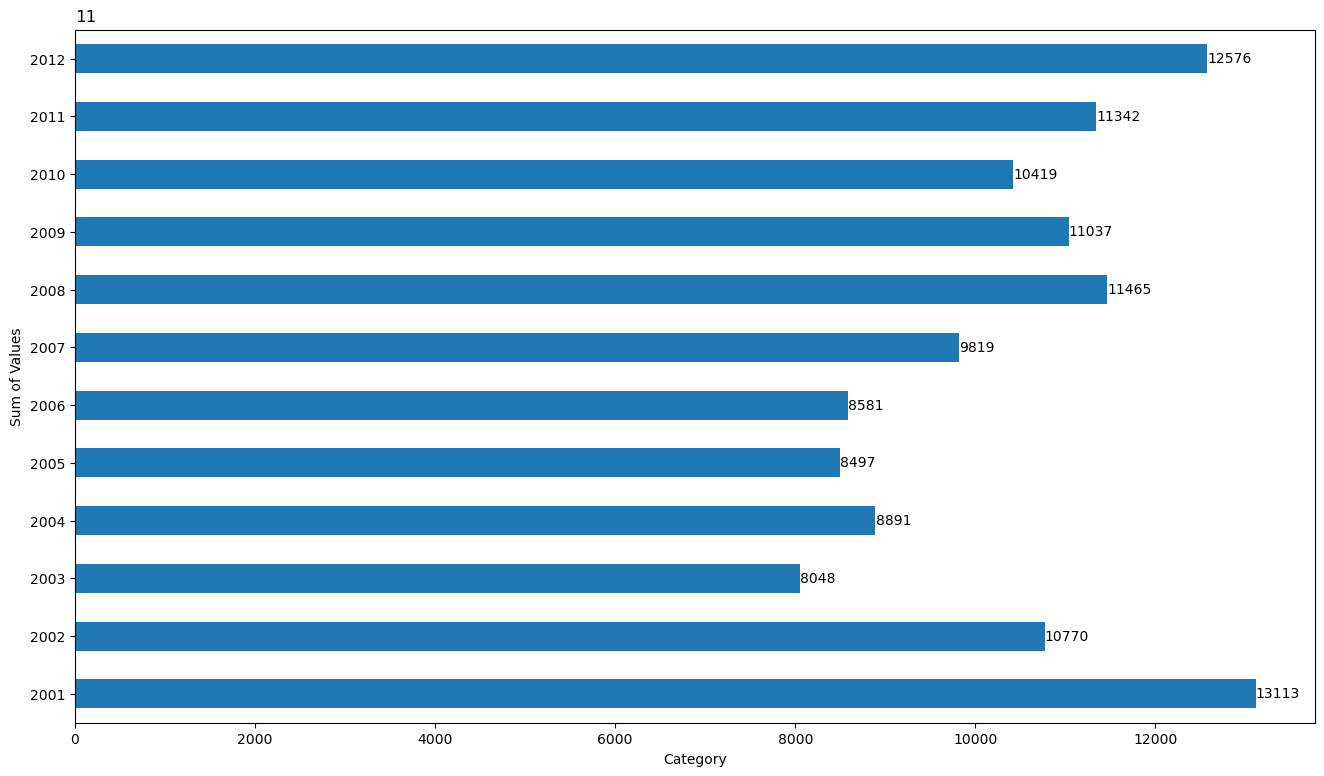

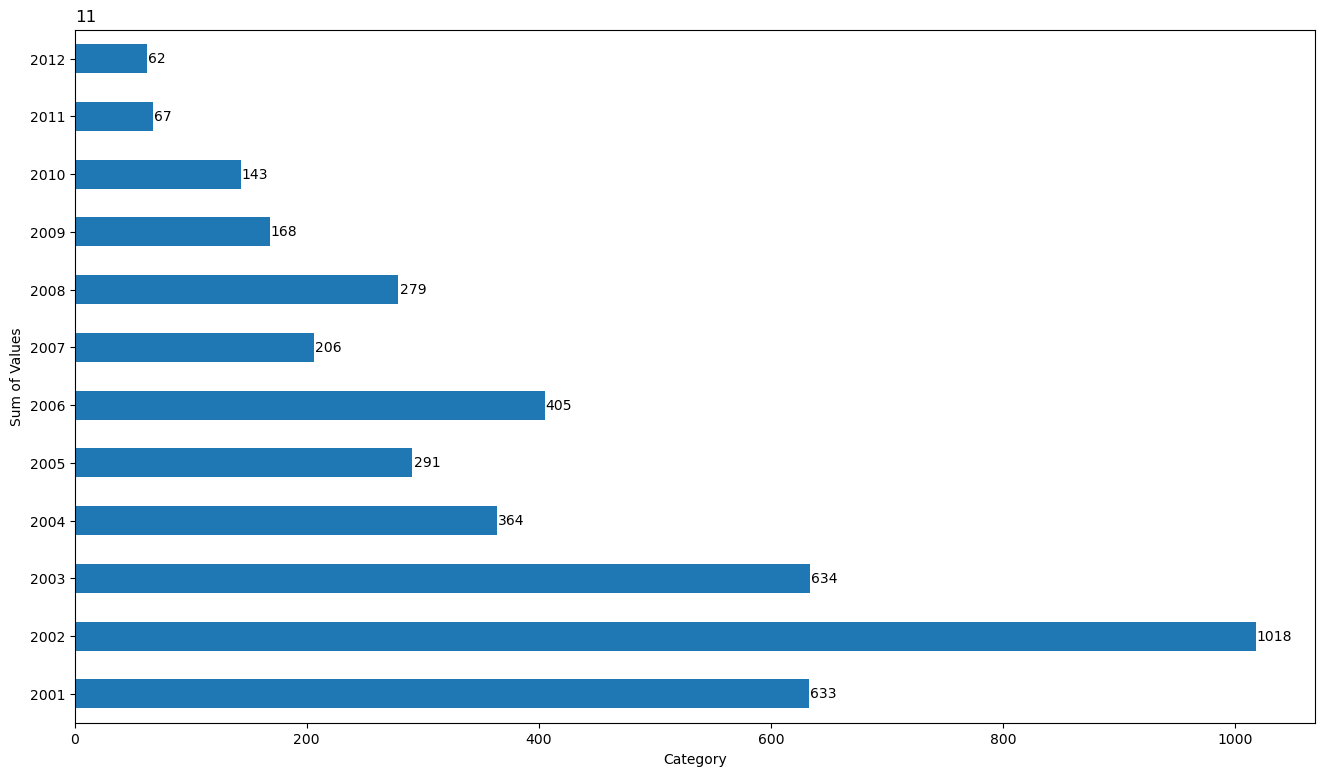

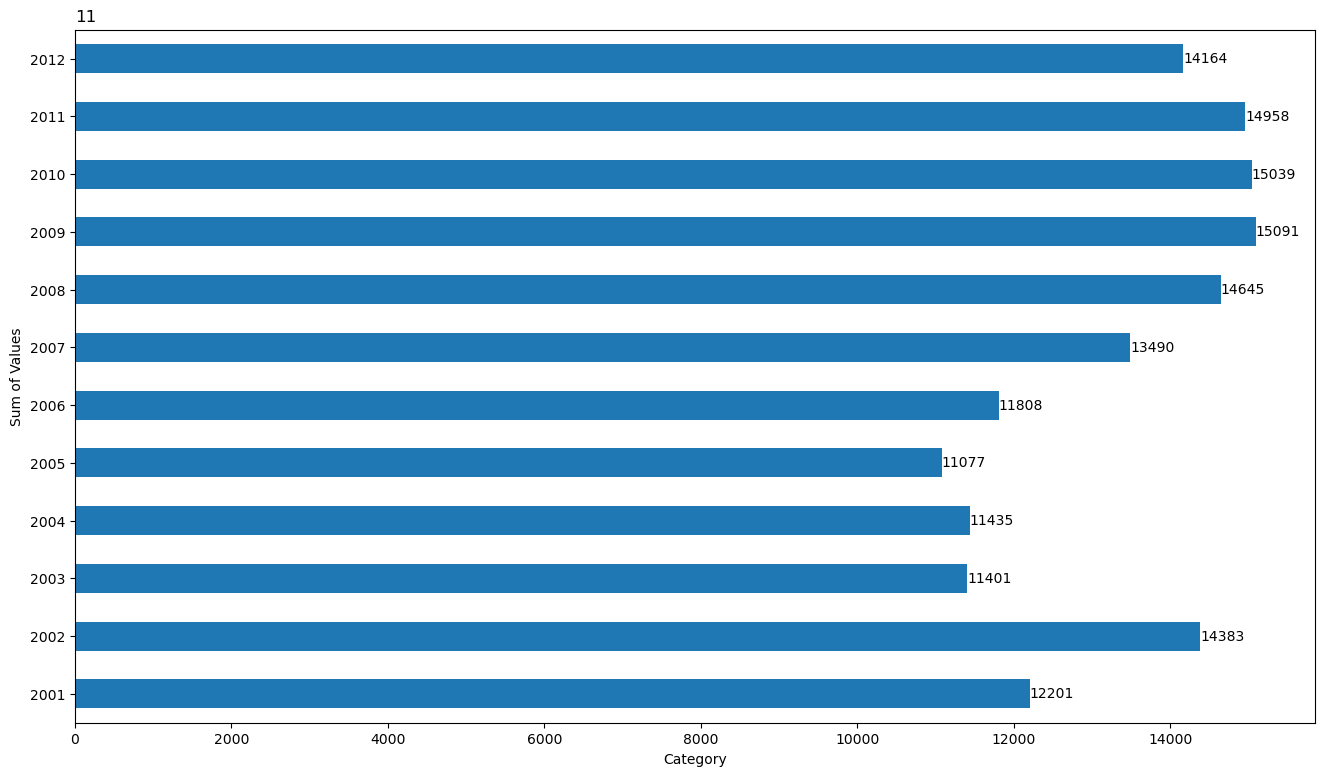

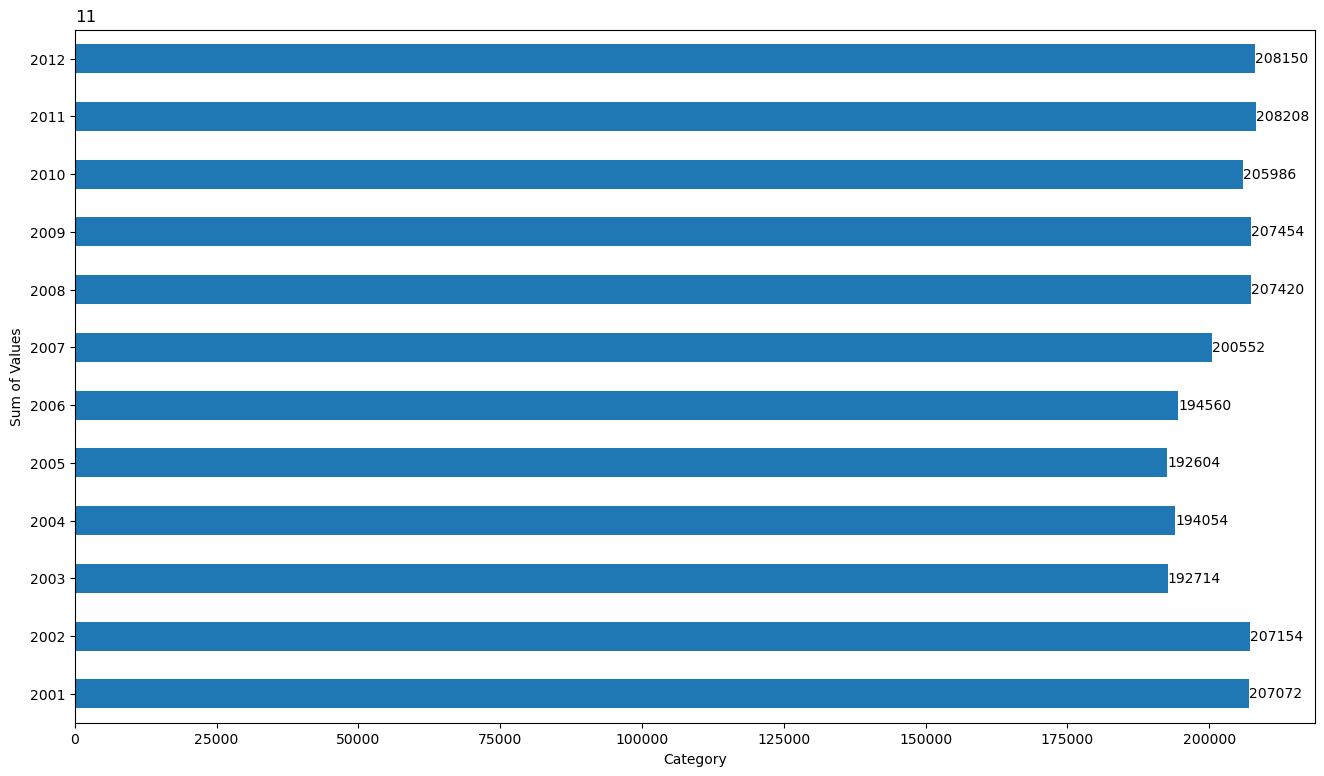

In [24]:

for i in df3:
      fig, ax = plt.subplots(figsize =(16, 9))
      grouped_year=df.groupby('Year')[i].sum()
      grouped_year.plot(kind='barh')
      # Set the x-axis label
      plt.xlabel('Category')

      # Set the y-axis label
      plt.ylabel('Sum of Values')
      for i, v in enumerate(grouped_year):
        ax.text(v + 1, i, str(v), color='black', va='center')
      ax.set_title(i,loc ='left', )
      # Show the plot
      plt.show()
      # ax.barh(cbs['STATE/UT'], cbs[i])
      # ax.set_title(i,
      #             loc ='left', )
      plt.show()

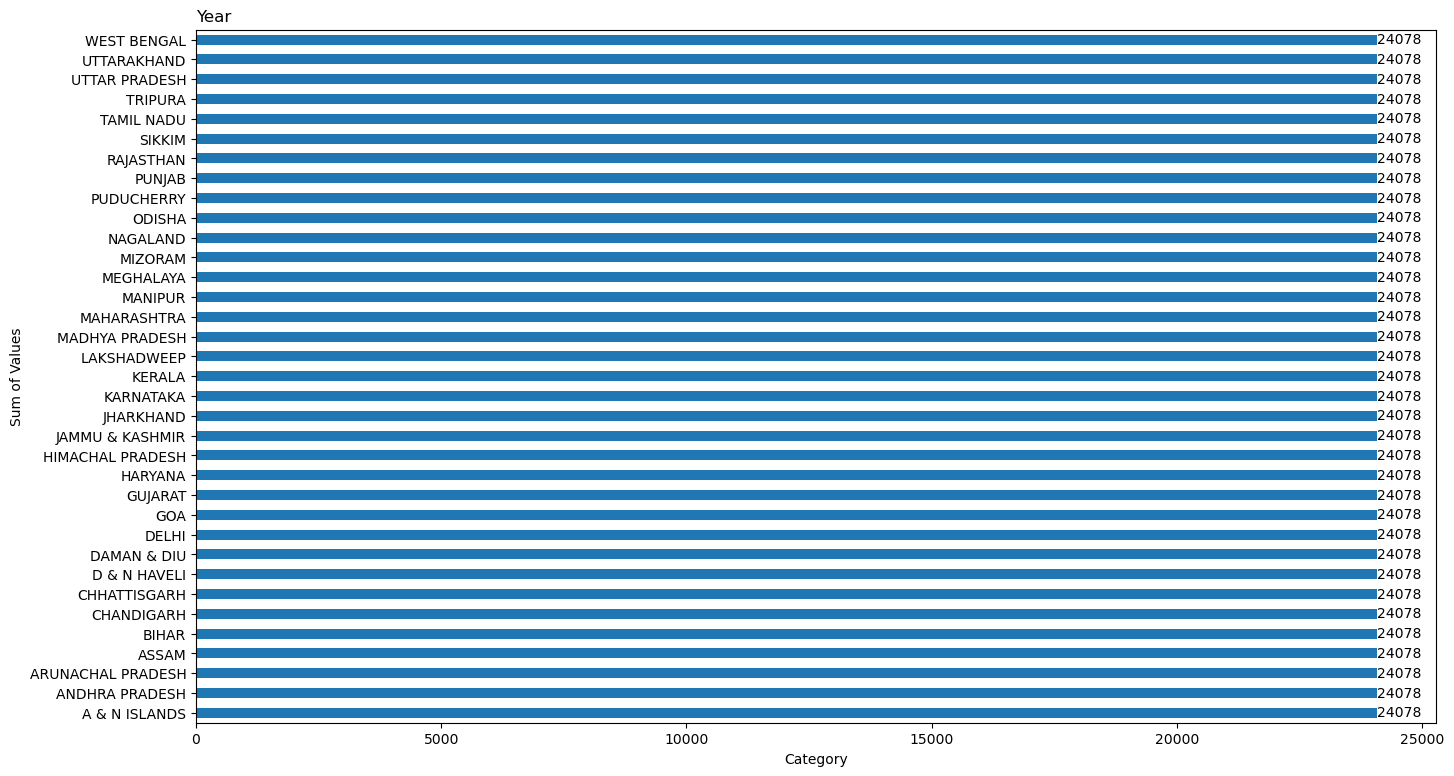

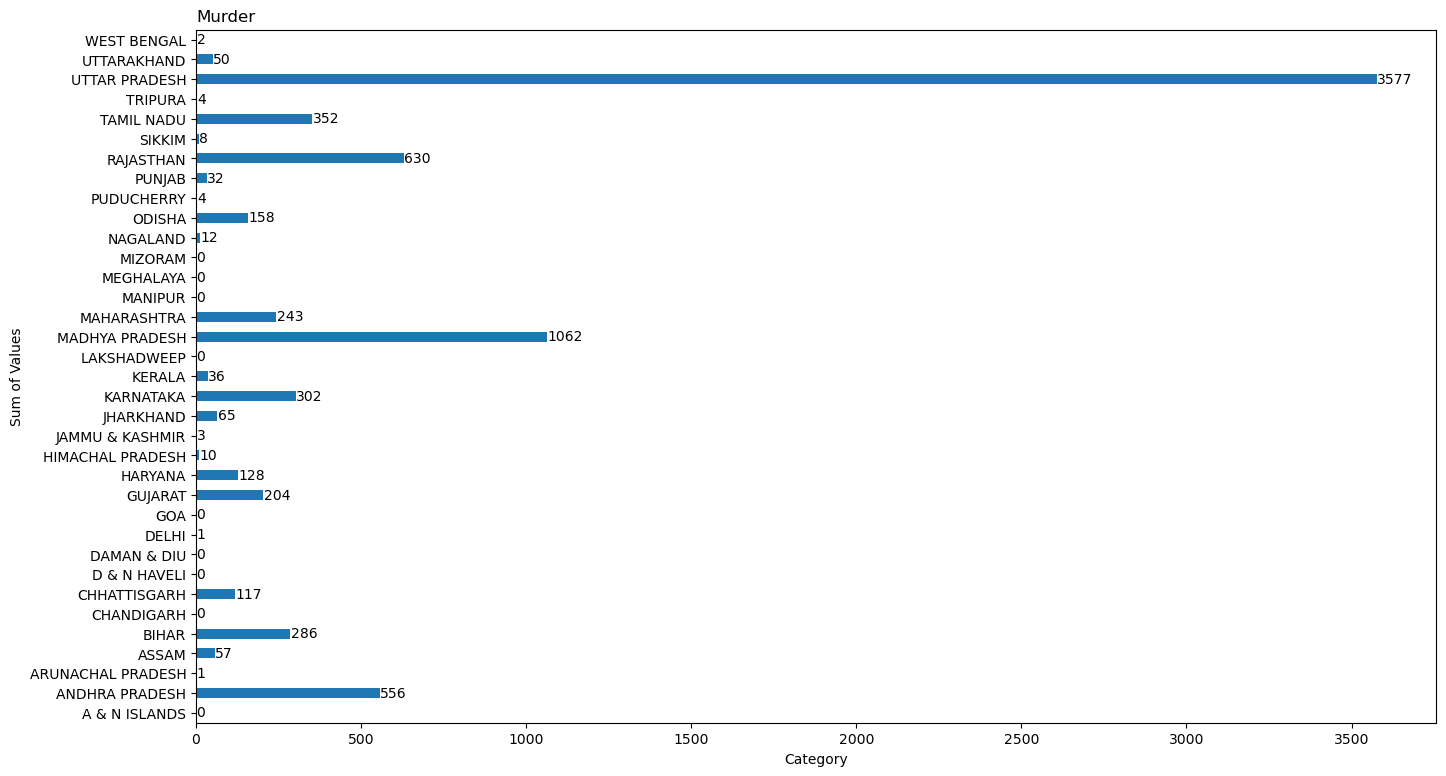

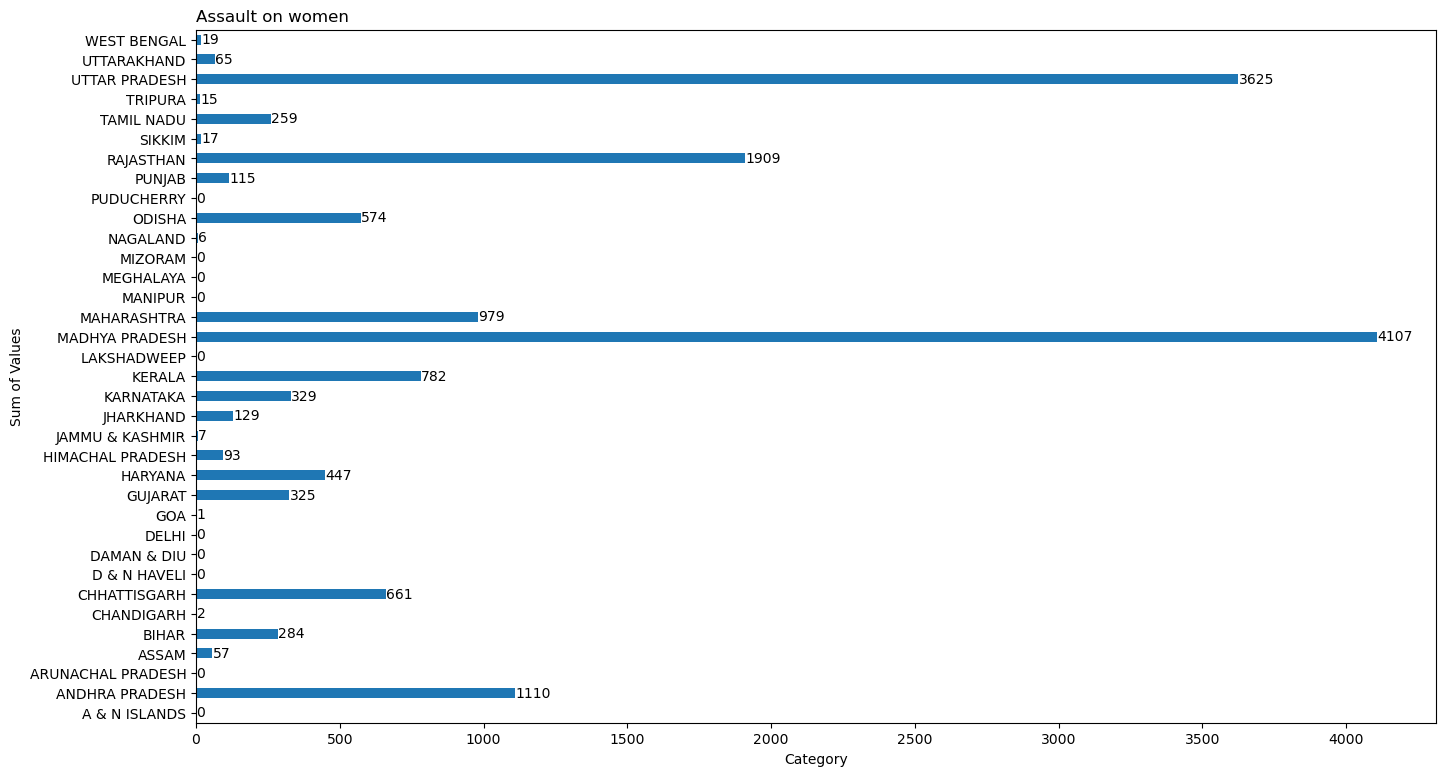

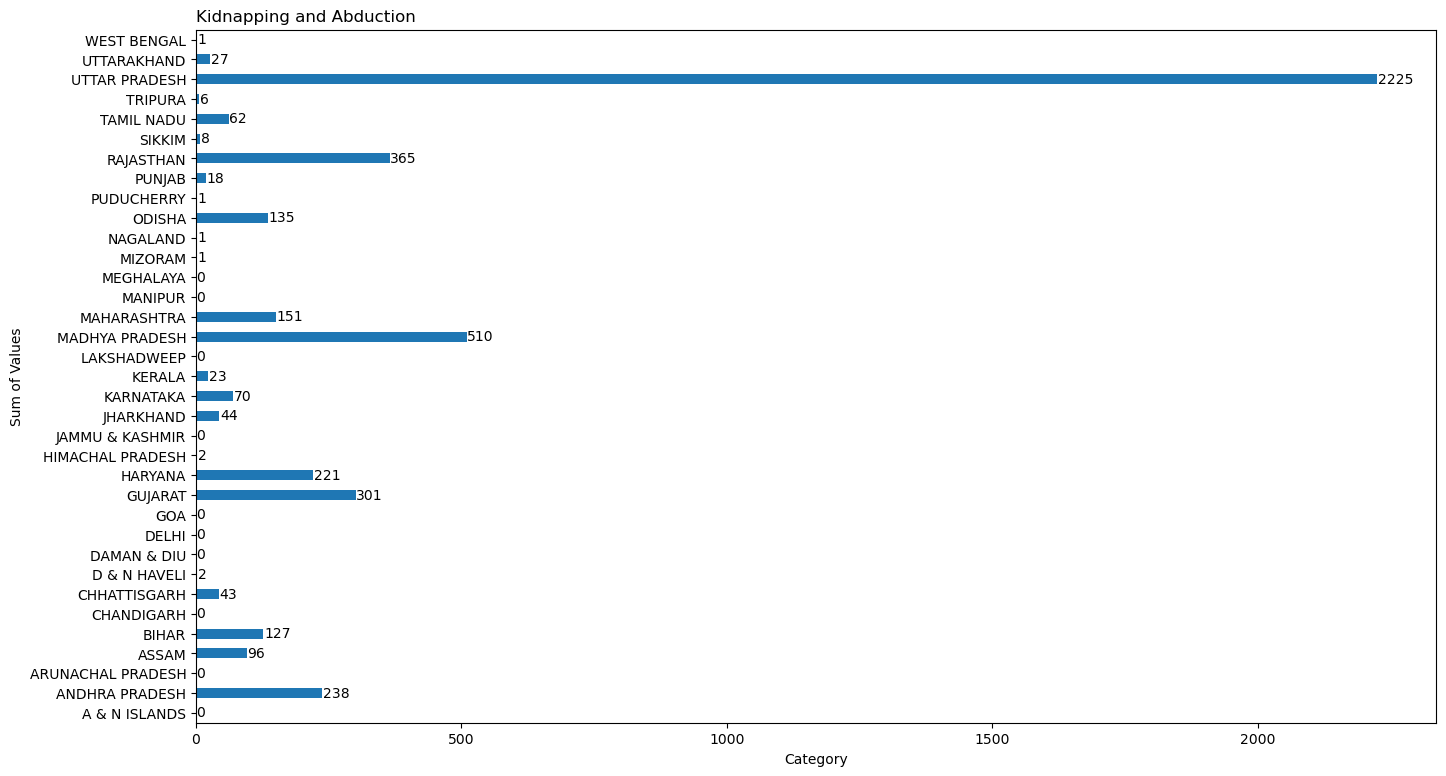

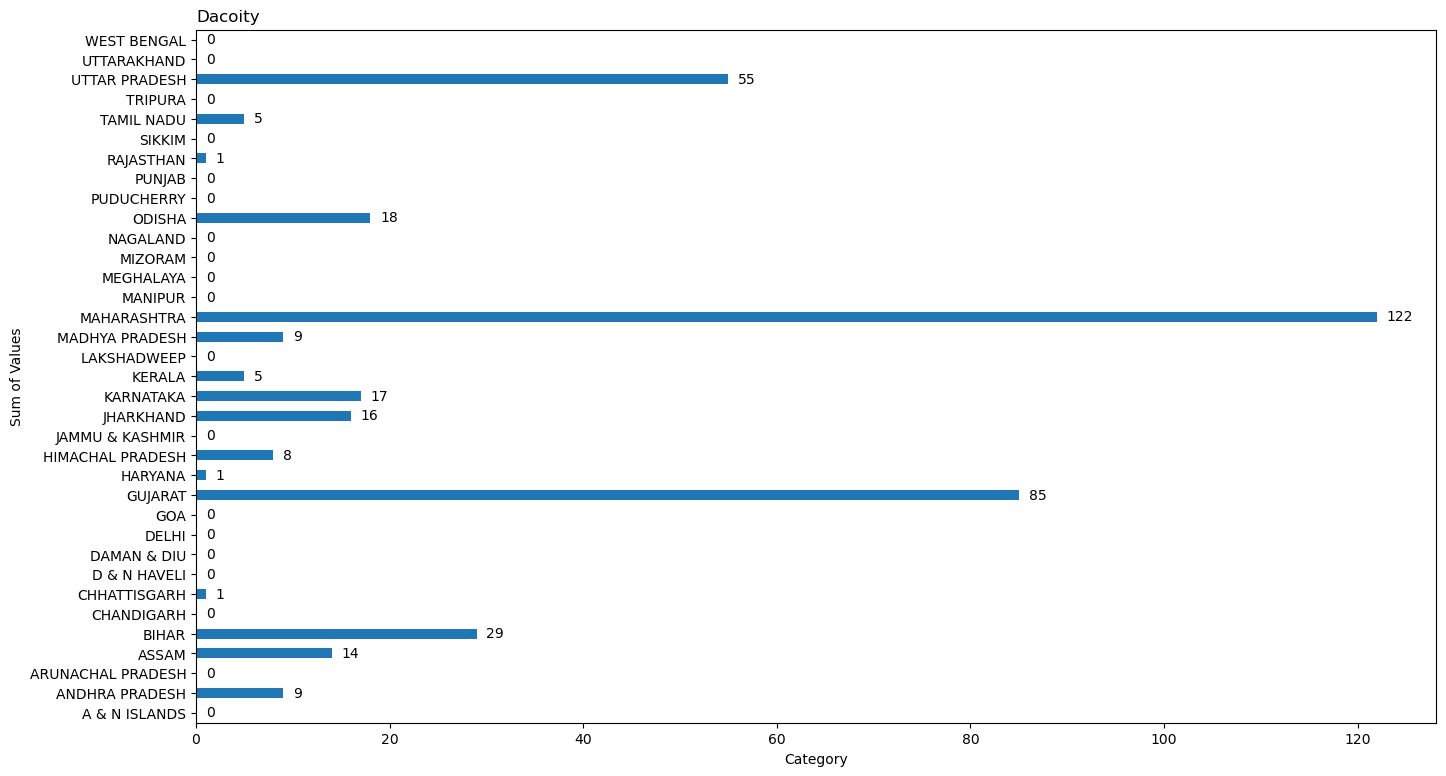

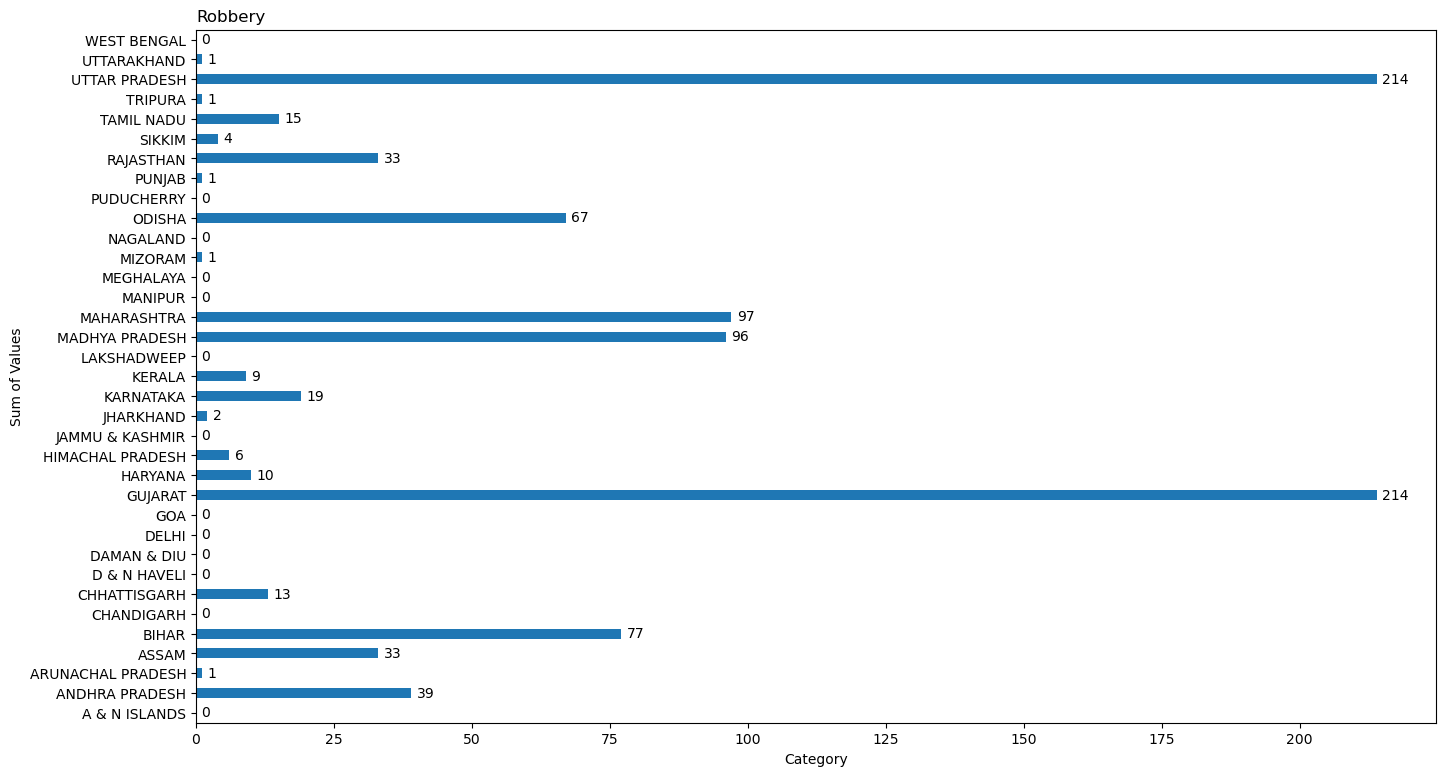

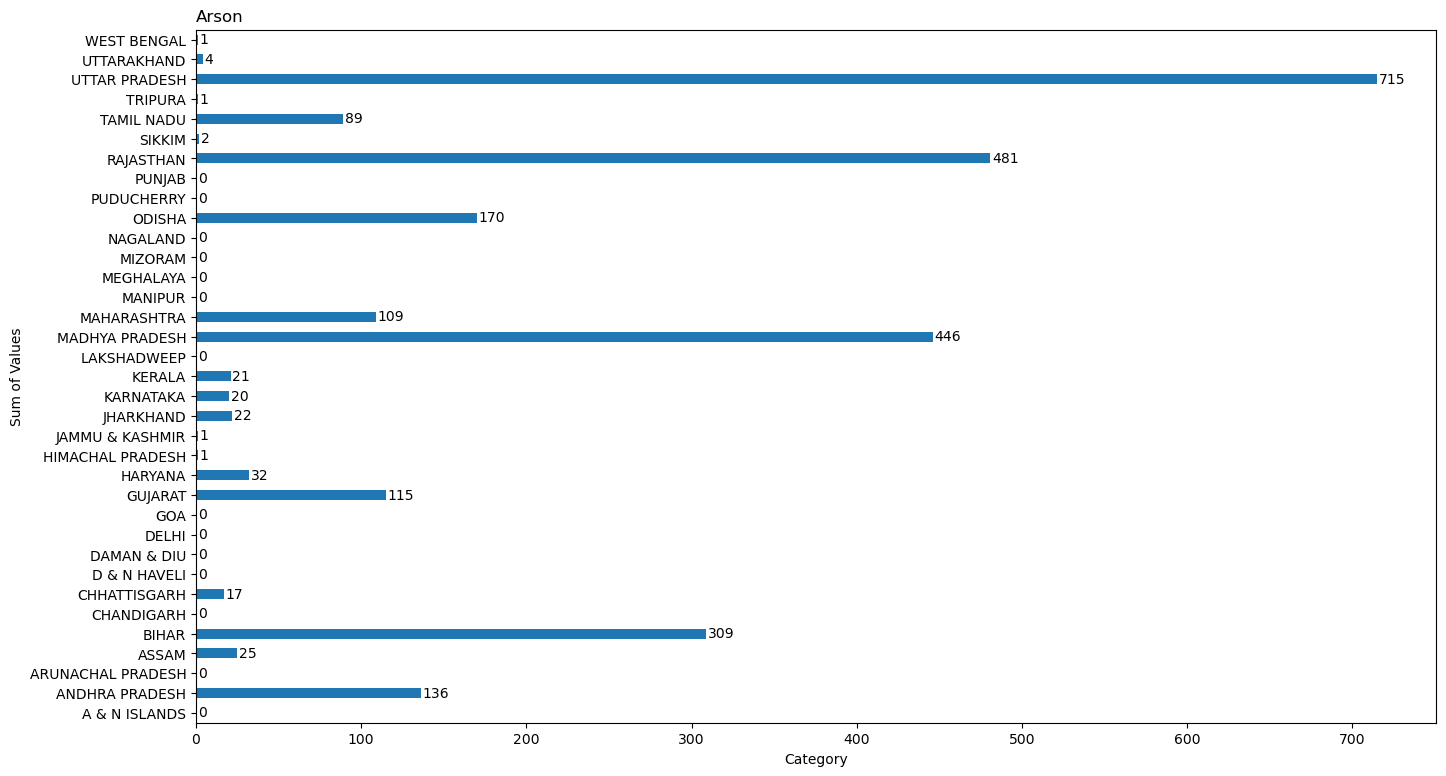

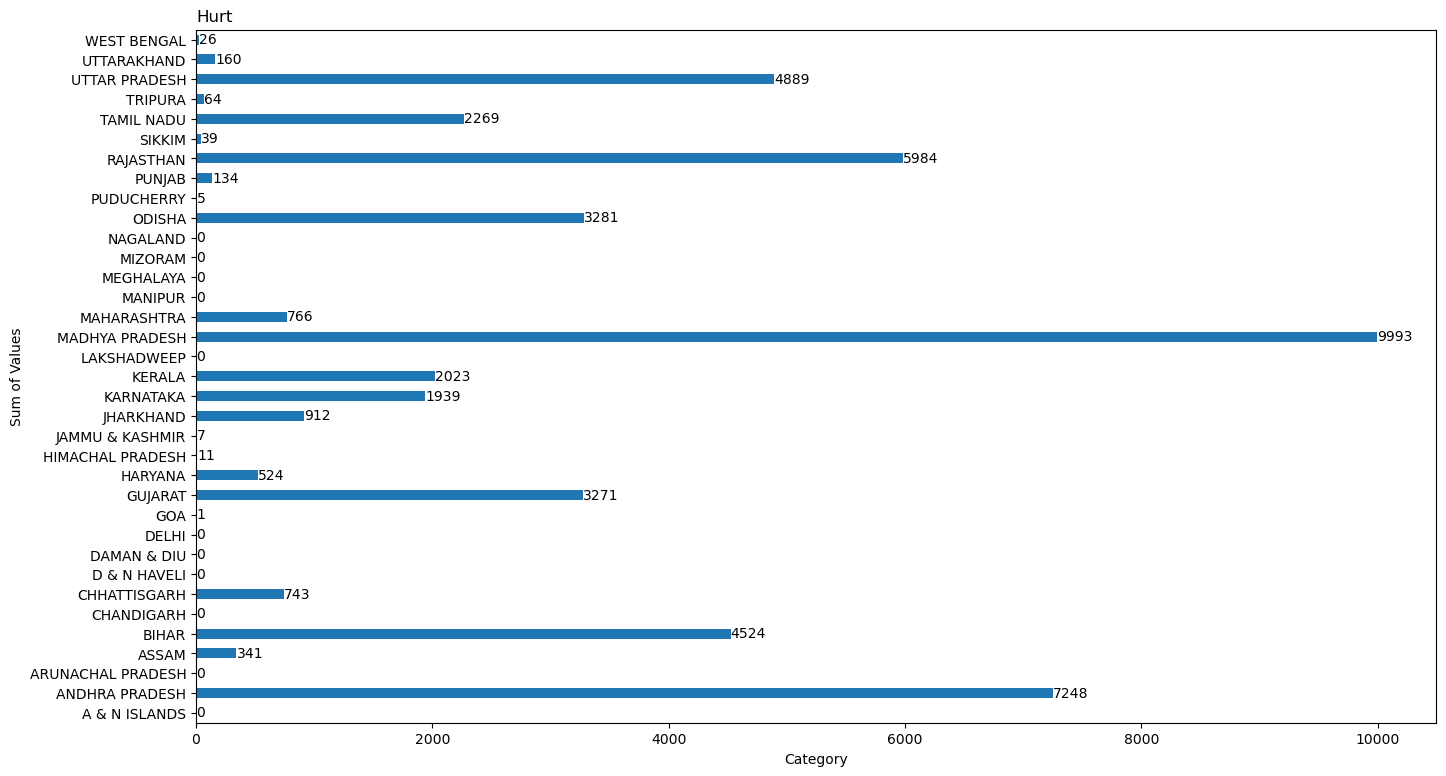

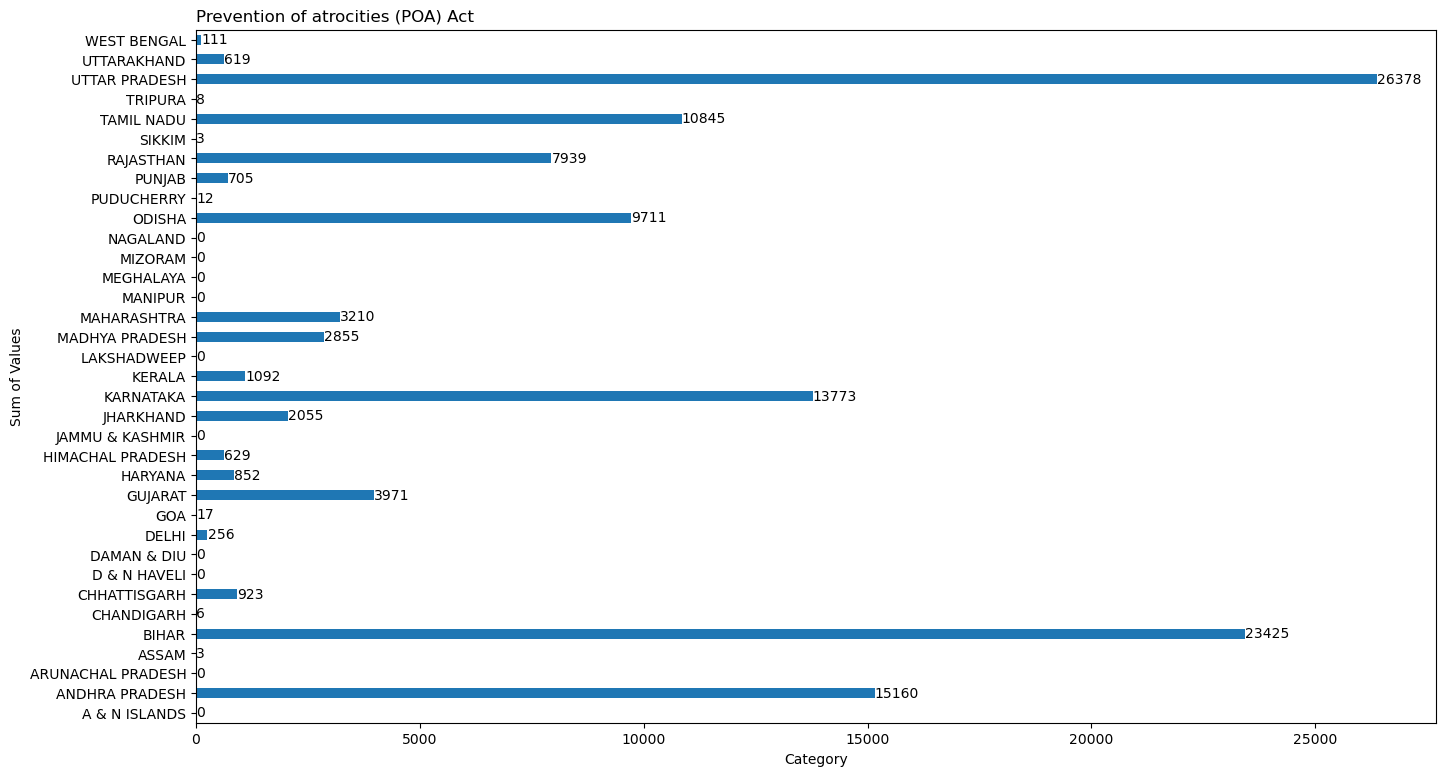

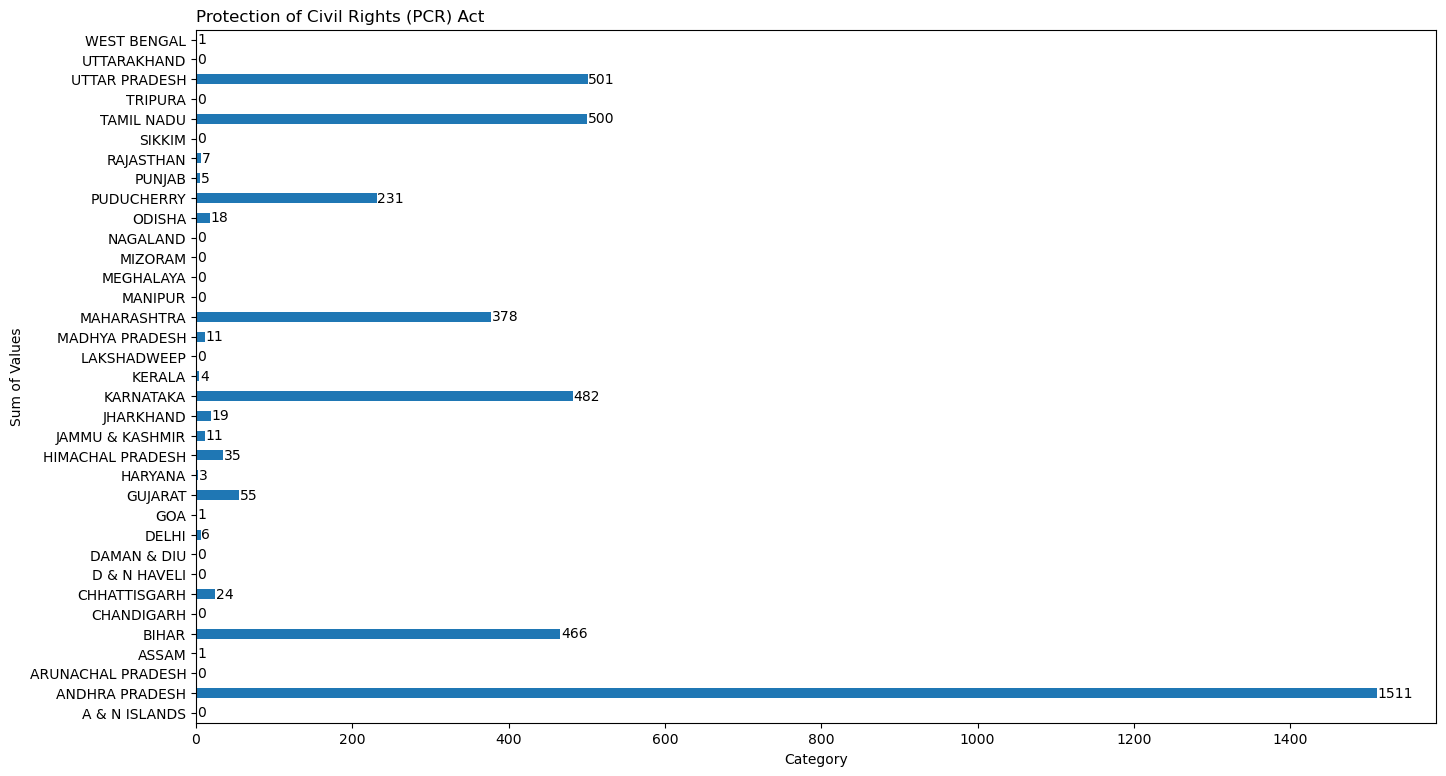

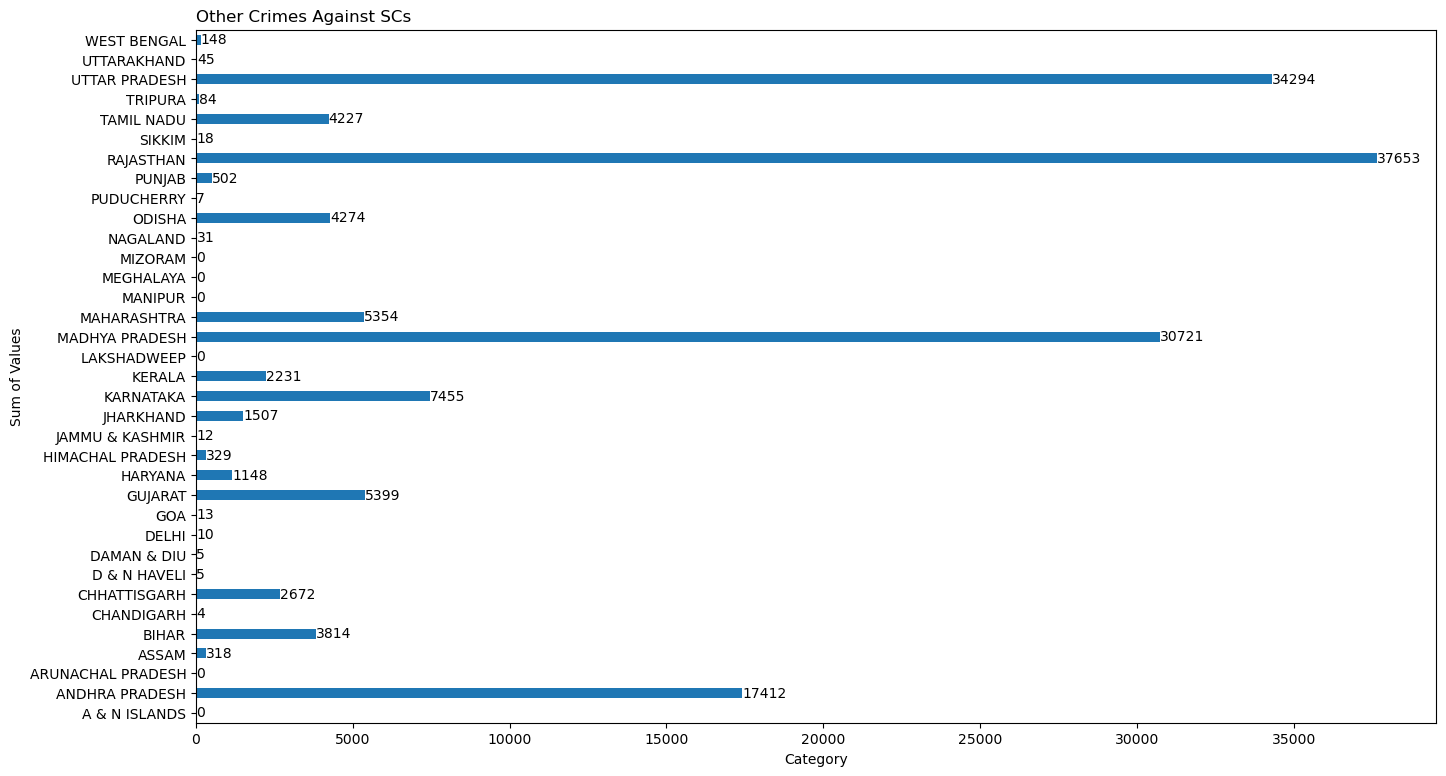

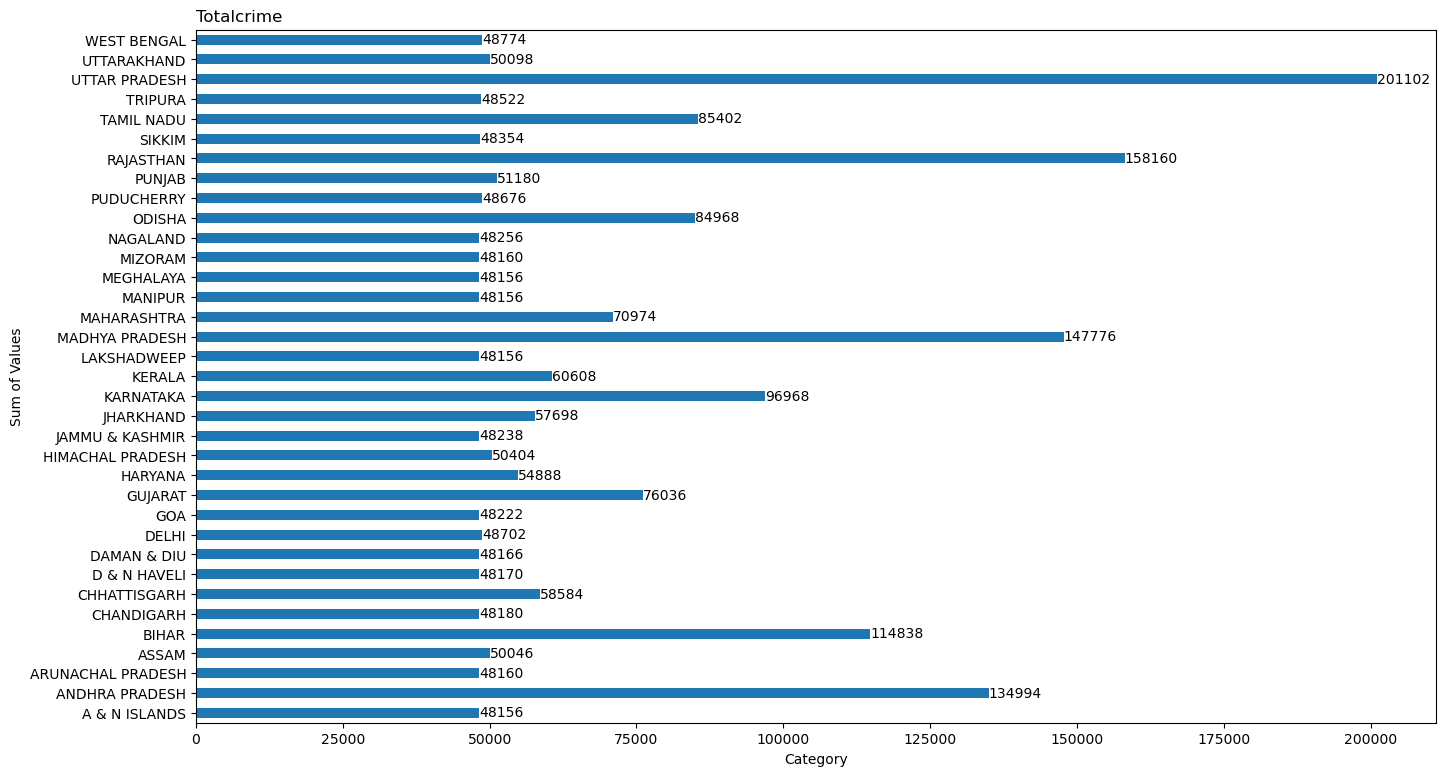

In [25]:
for i in df3:
      fig, ax = plt.subplots(figsize =(16, 9))
      grouped_crime=df.groupby('STATE/UT')[i].sum()
      grouped_crime.plot(kind='barh')
      # Set the x-axis label
      plt.xlabel('Category')

      # Set the y-axis label
      plt.ylabel('Sum of Values')
      for J, v in enumerate(grouped_crime):
        ax.text(v + 1, J, str(v), color='black', va='center')
      ax.set_title(i,loc ='left', )

      # Show the plot
      plt.show()
      # ax.barh(cbs['STATE/UT'], cbs[i])
     
     


Visualizing the total crimes across different states for all the years from 2001-2012



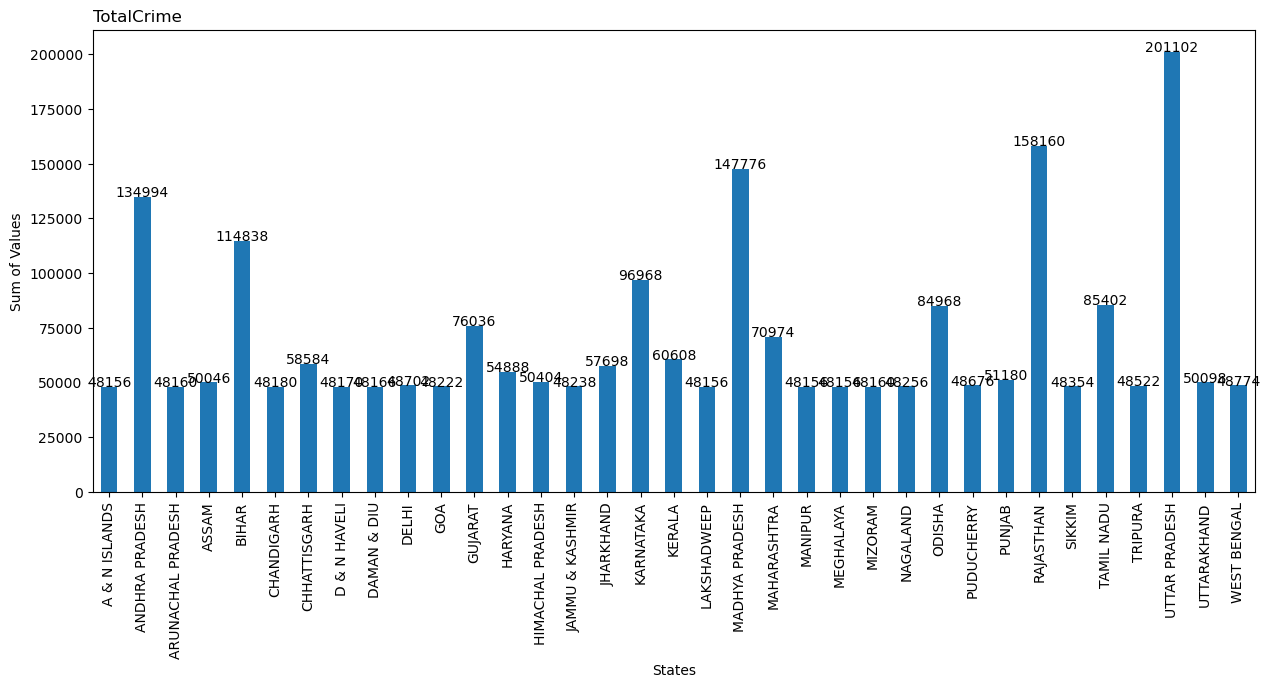

In [26]:



fig,ax = plt.subplots(figsize=(15,6))
grouped_tot=df.groupby('STATE/UT')['Totalcrime'].sum()
grouped_tot.plot(kind='bar')

# Set the x-axis label
plt.xlabel('States')

# Set the y-axis label
plt.ylabel('Sum of Values')
for i, v in enumerate(df.groupby('STATE/UT')['Totalcrime'].sum()):
    ax.text(i, v + 1, str(v), ha='center')
ax.set_title('TotalCrime',loc ='left', )

# Show the plot
plt.show()
     

Visualizing using scatter plot. Finding correlation between murder and assualt on women

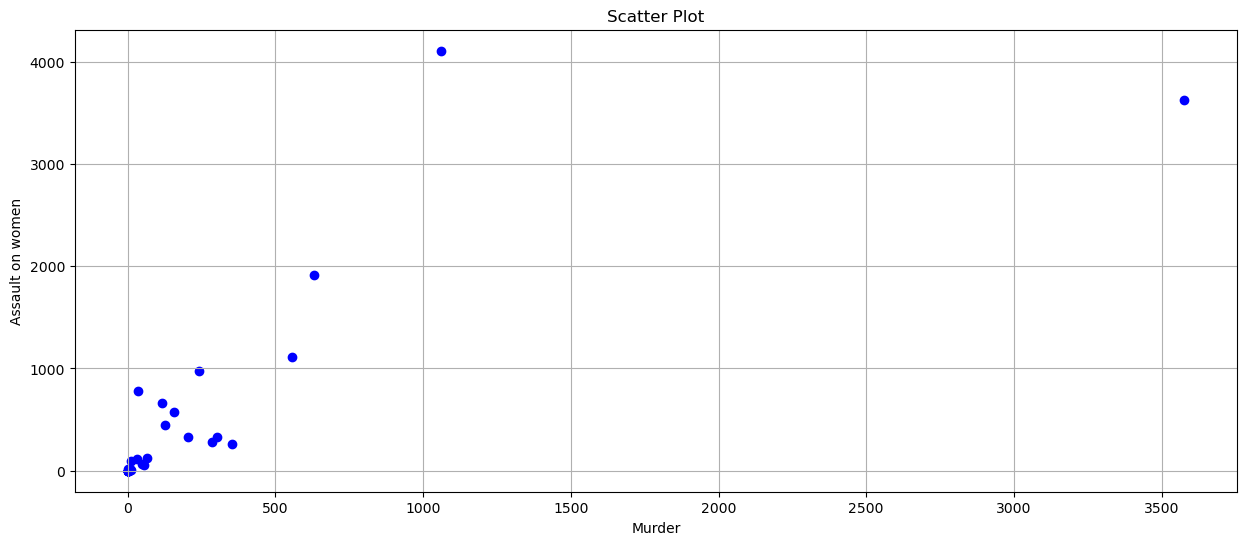

In [27]:
fig, ax = plt.subplots(figsize=(15,6))
grouped_murder=df.groupby('STATE/UT')['Murder'].sum()
grouped_assault=df.groupby('STATE/UT')['Assault on women'].sum()
plt.scatter(grouped_murder, grouped_assault, marker='o', color='b')

plt.xlabel('Murder')
plt.ylabel('Assault on women')
plt.title('Scatter Plot')

plt.grid(True)

plt.show()

     


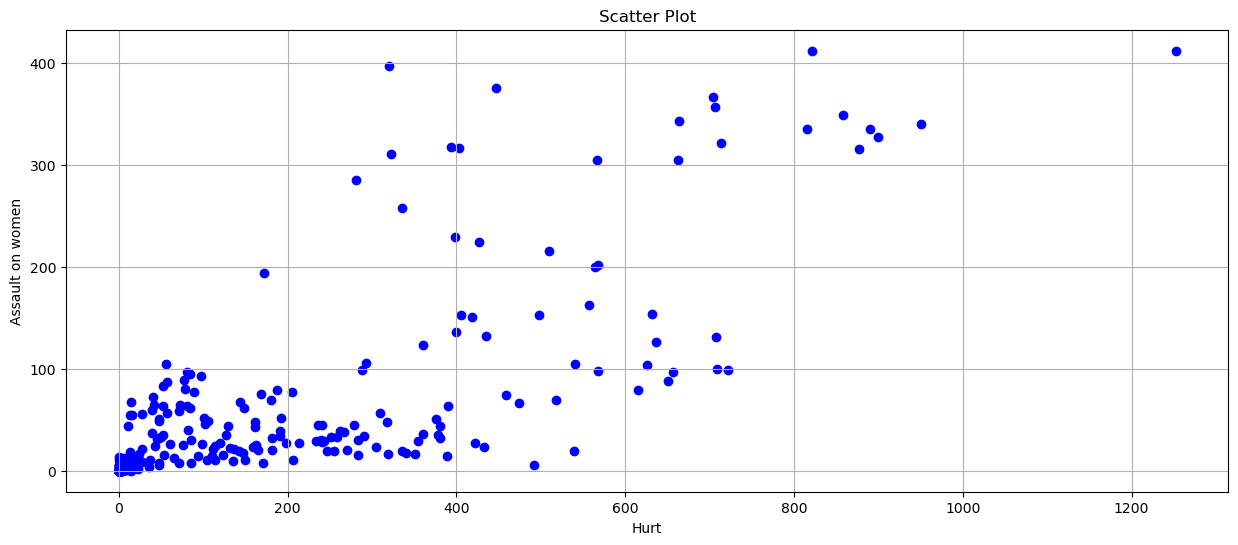

In [28]:

fig, ax = plt.subplots(figsize=(15,6))

plt.scatter(df['Hurt'], df['Assault on women'], marker='o', color='b')

plt.xlabel('Hurt')
plt.ylabel('Assault on women')
plt.title('Scatter Plot')

plt.grid(True)

plt.show()


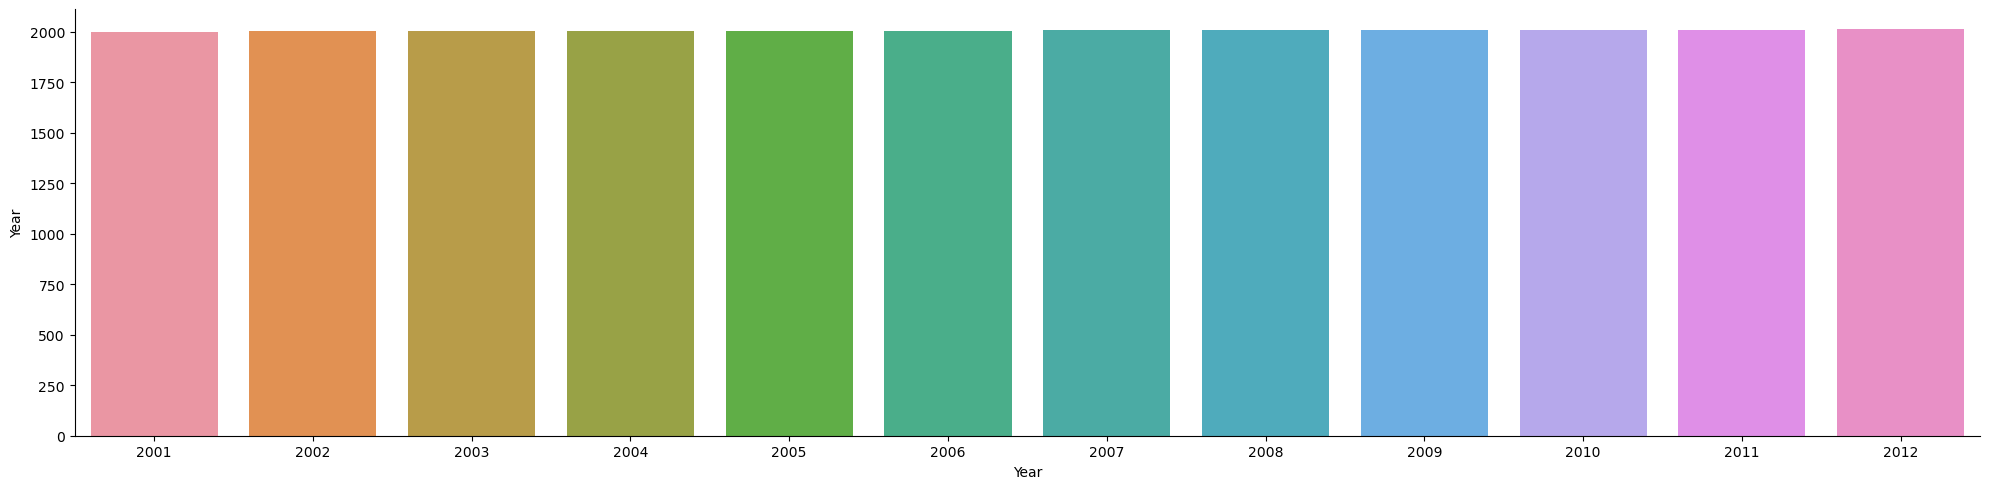

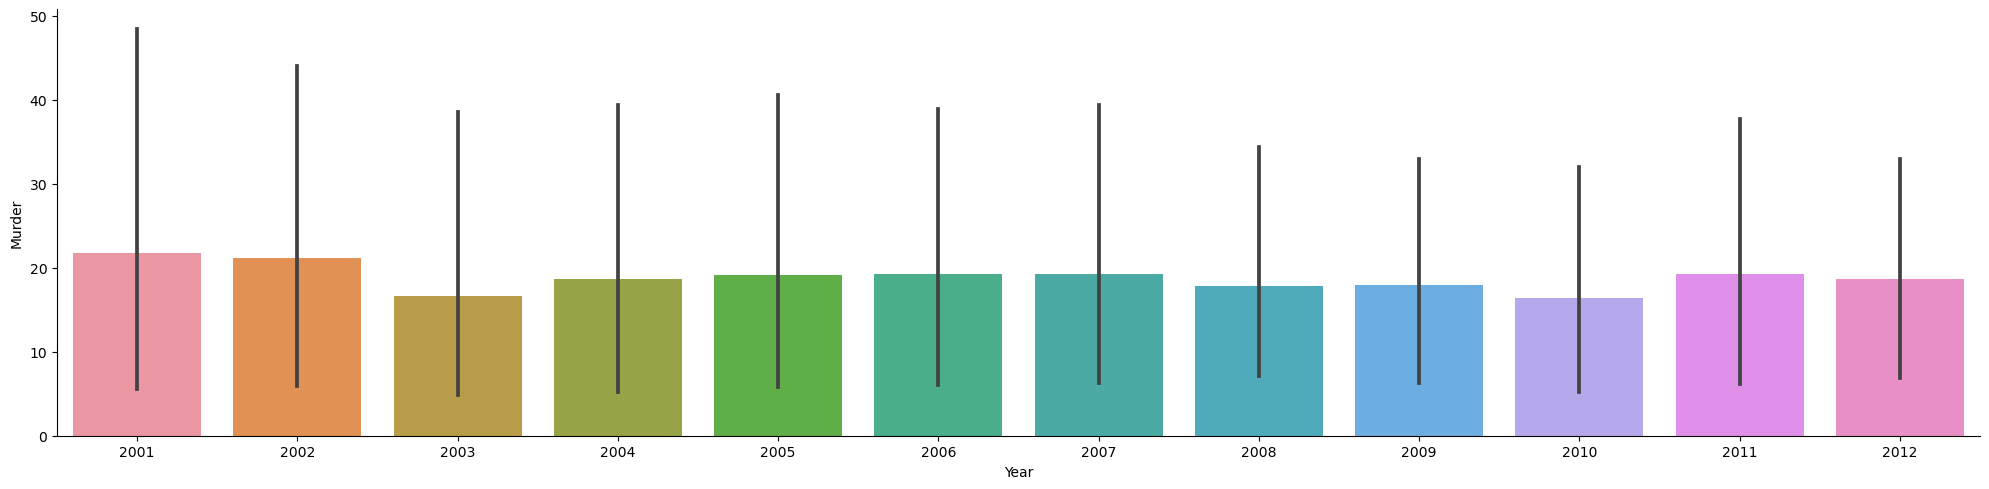

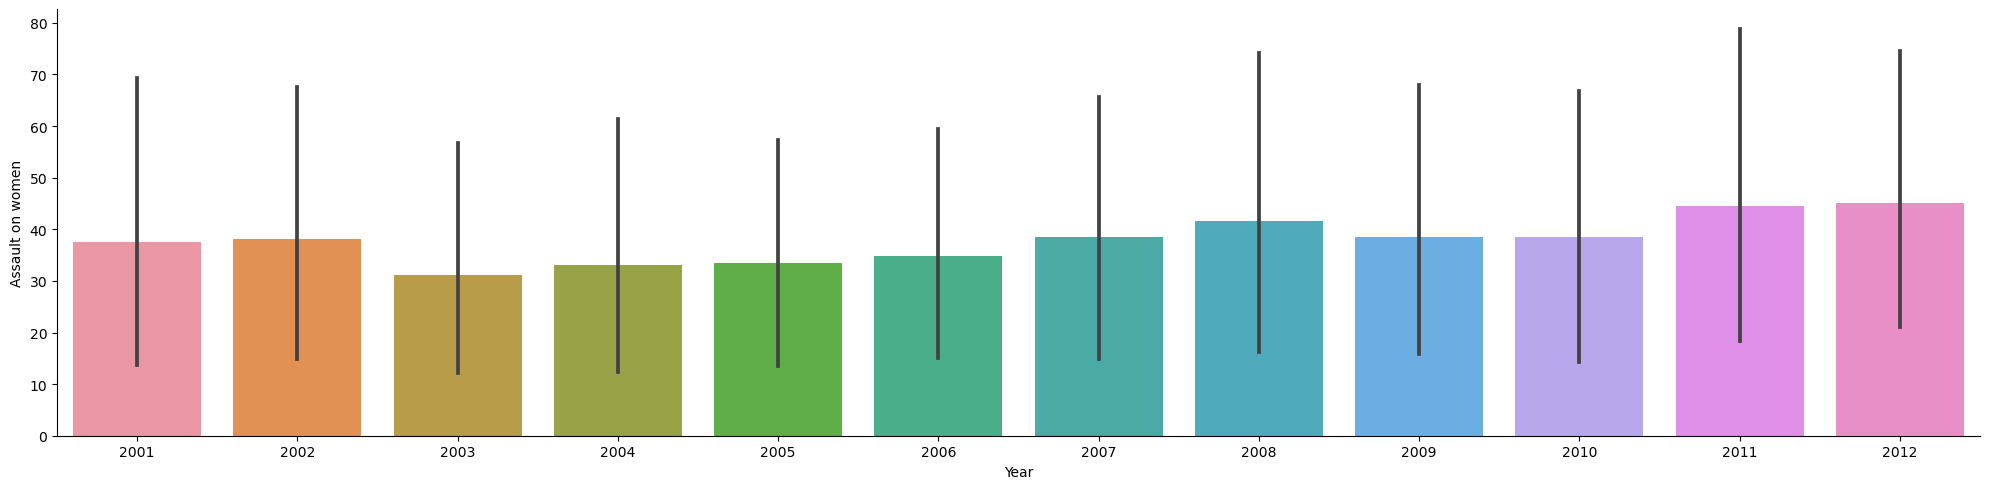

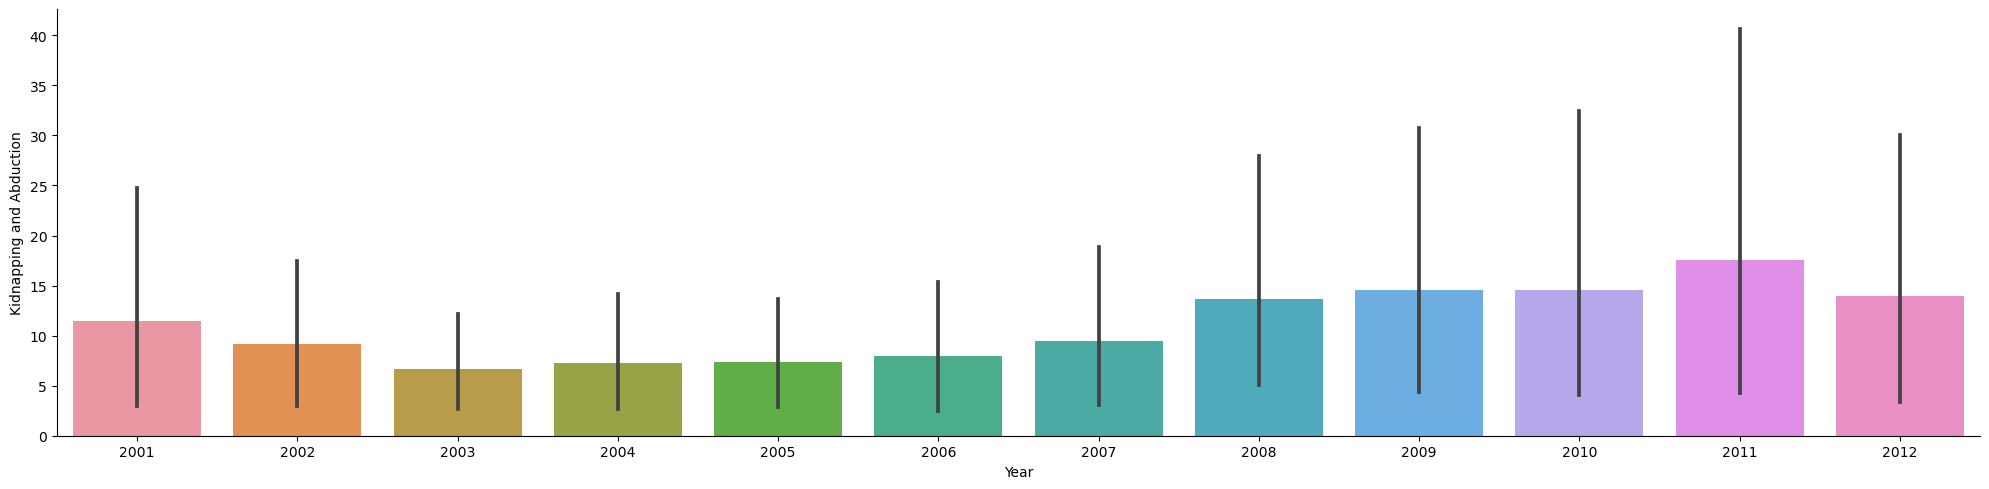

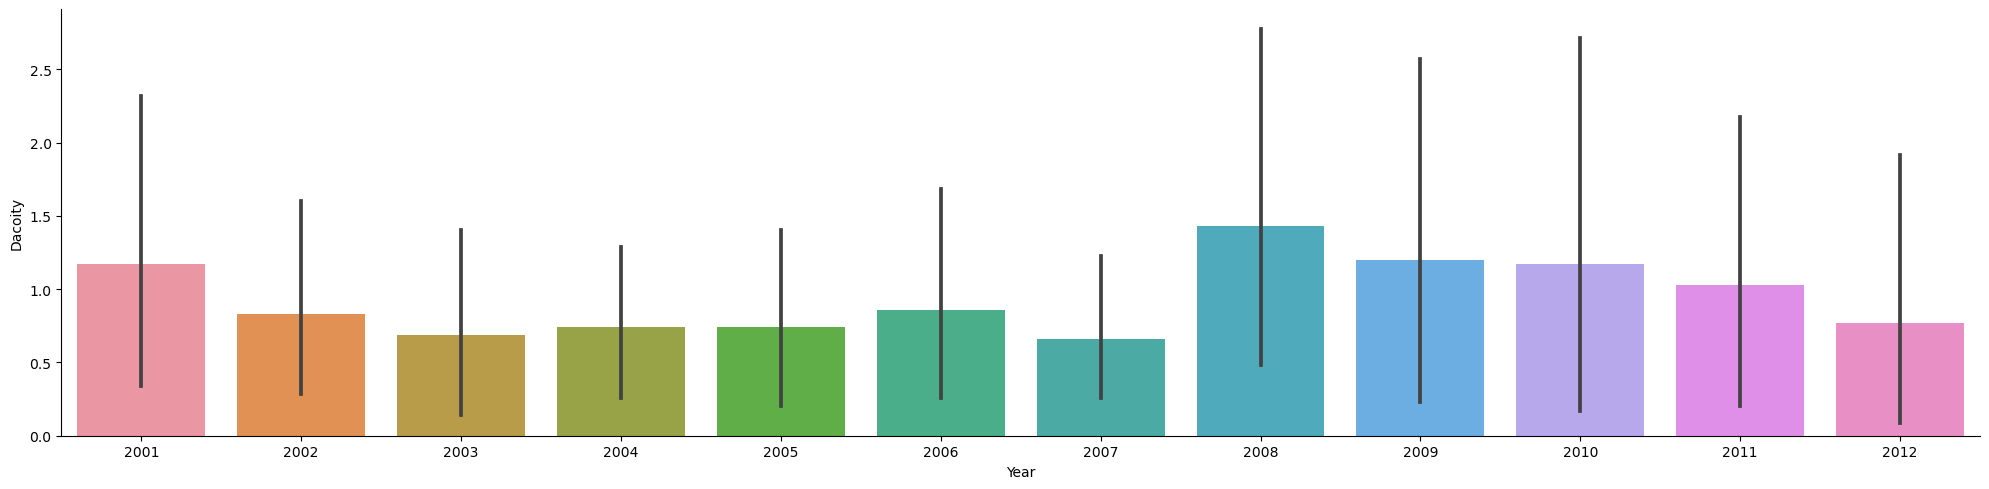

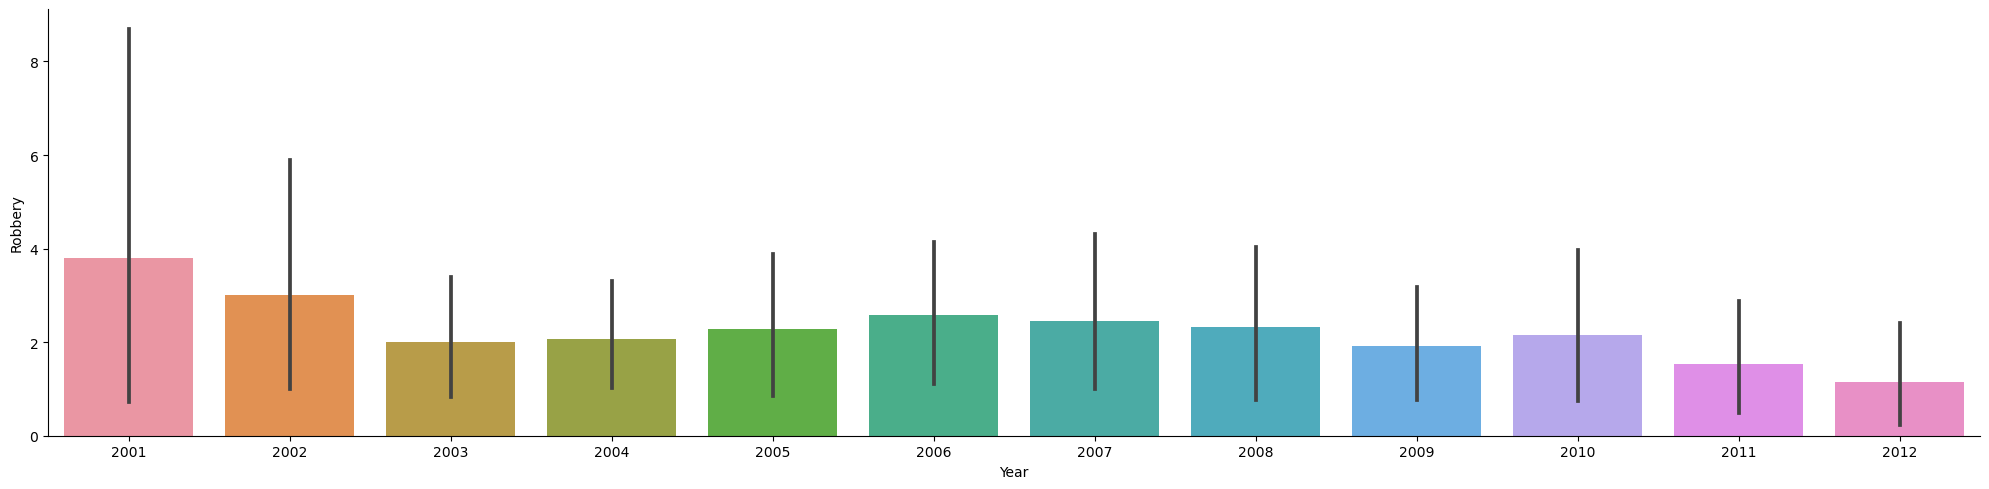

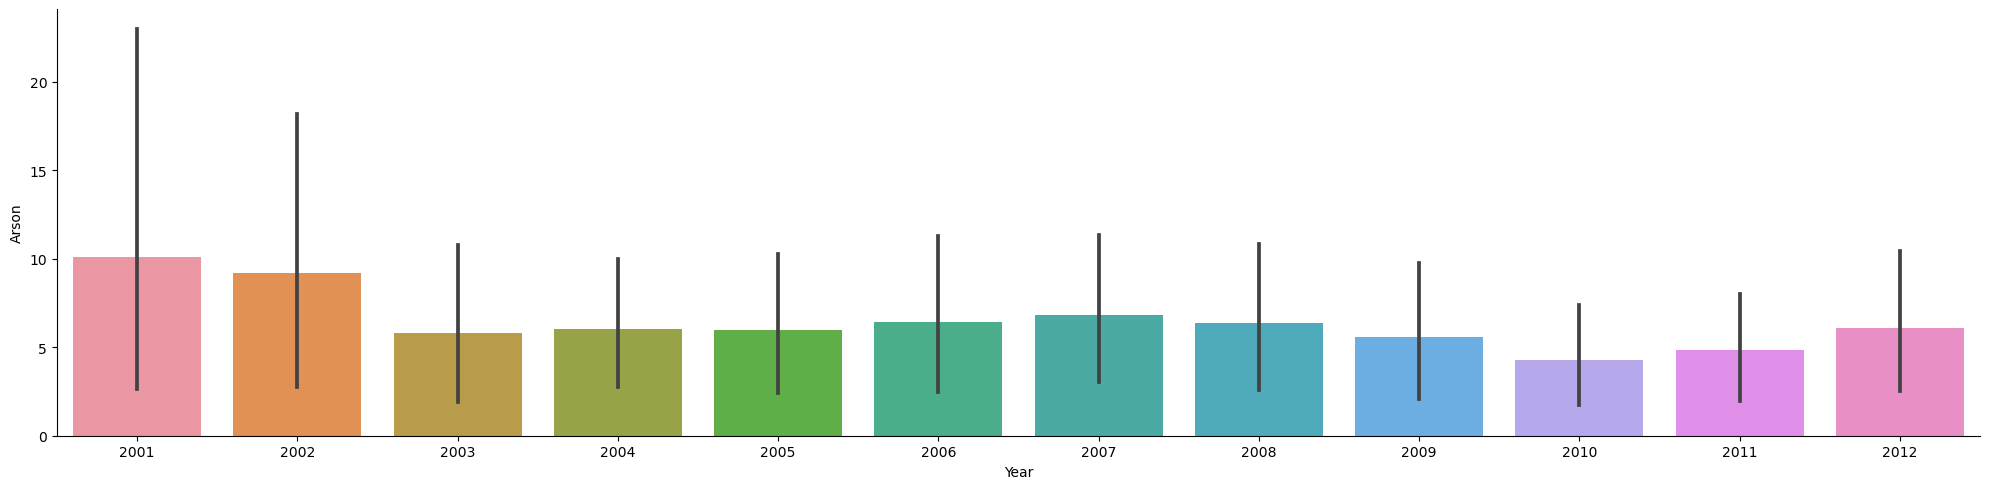

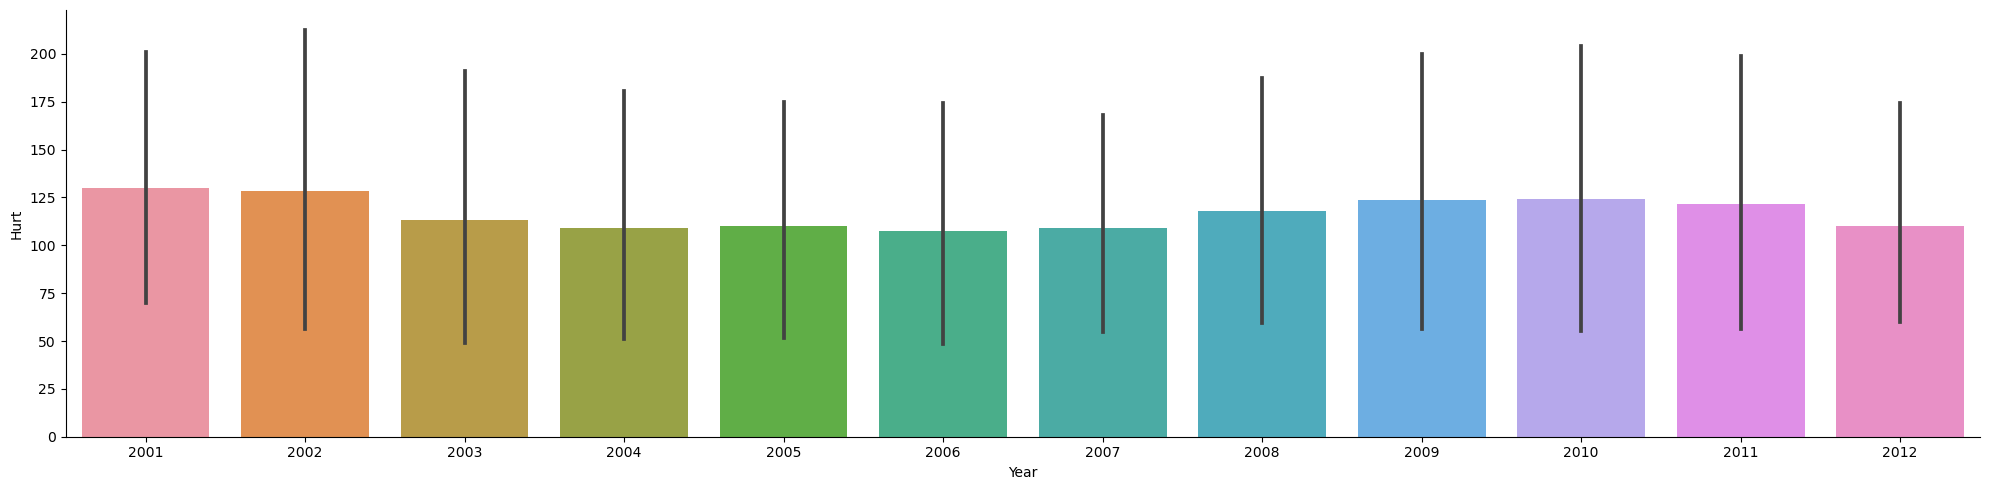

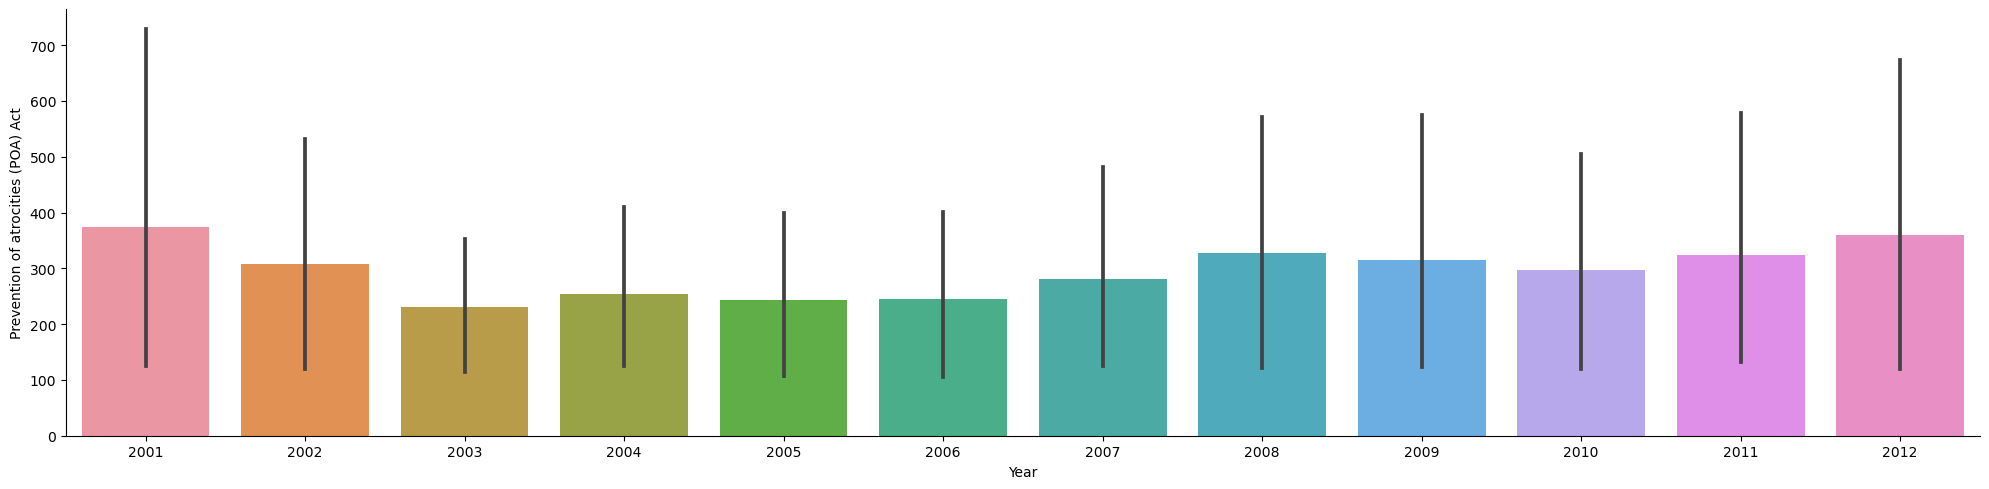

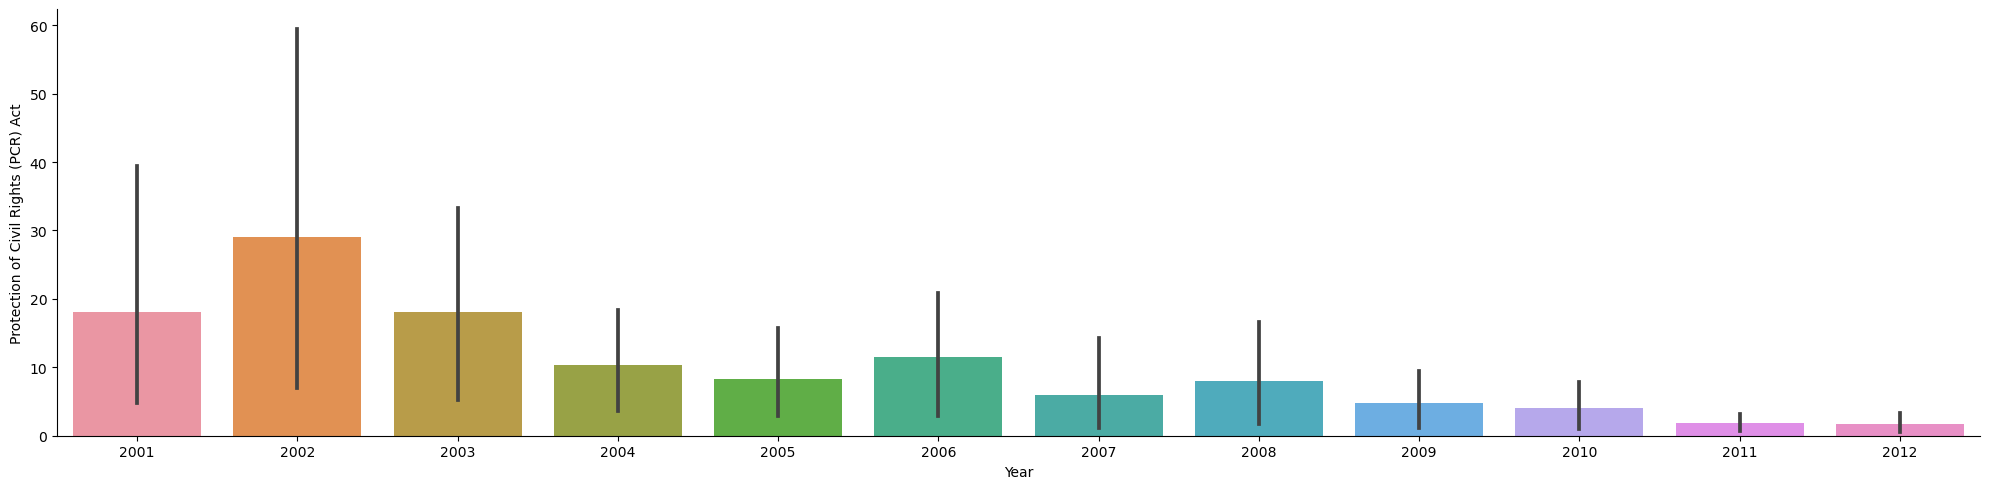

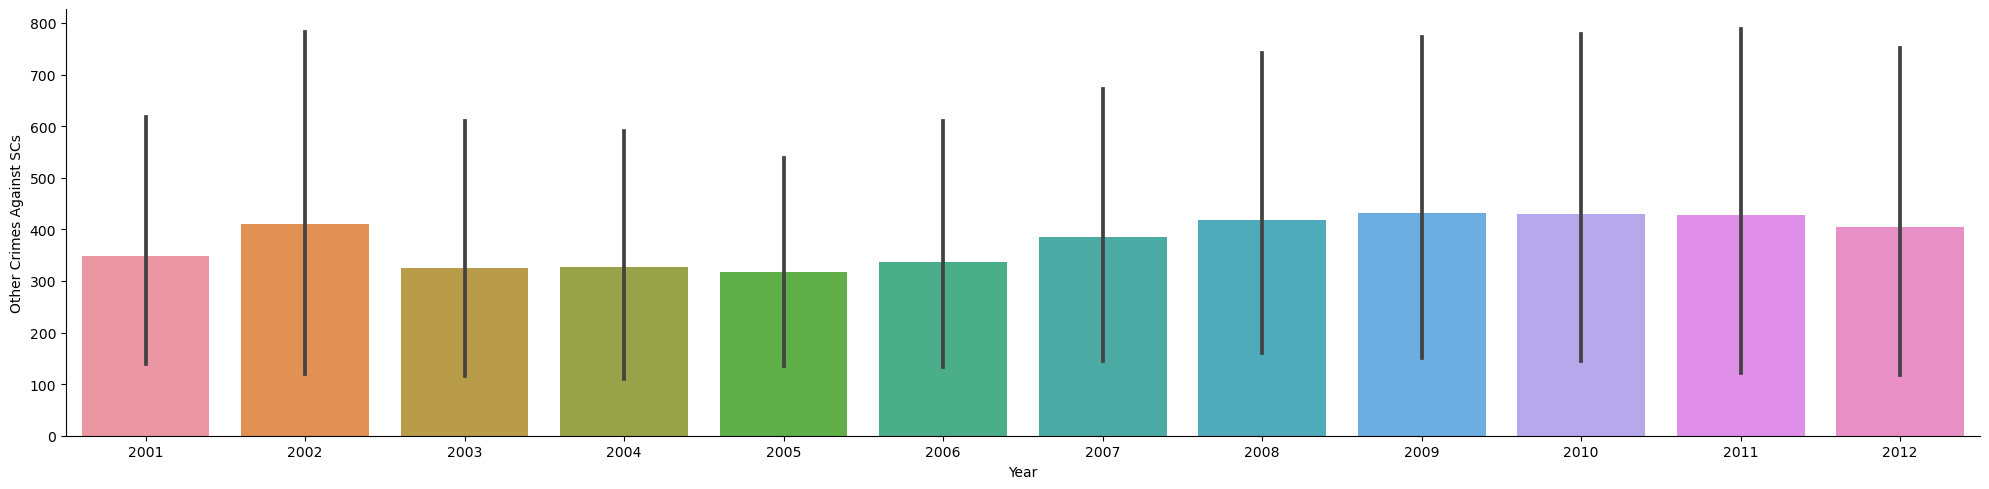

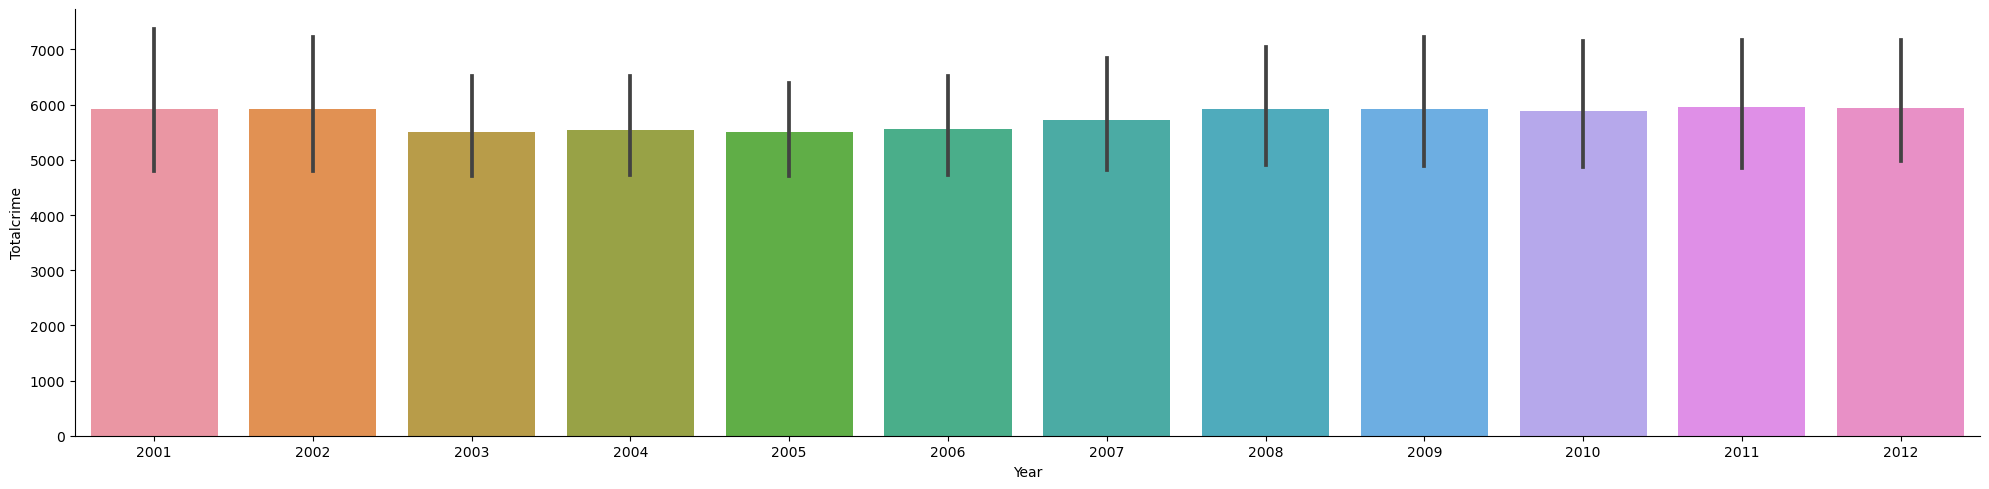

In [31]:
for i in df3:
  sns.catplot(x='Year', y=i, data=df ,height = 5, aspect = 4,kind = 'bar')

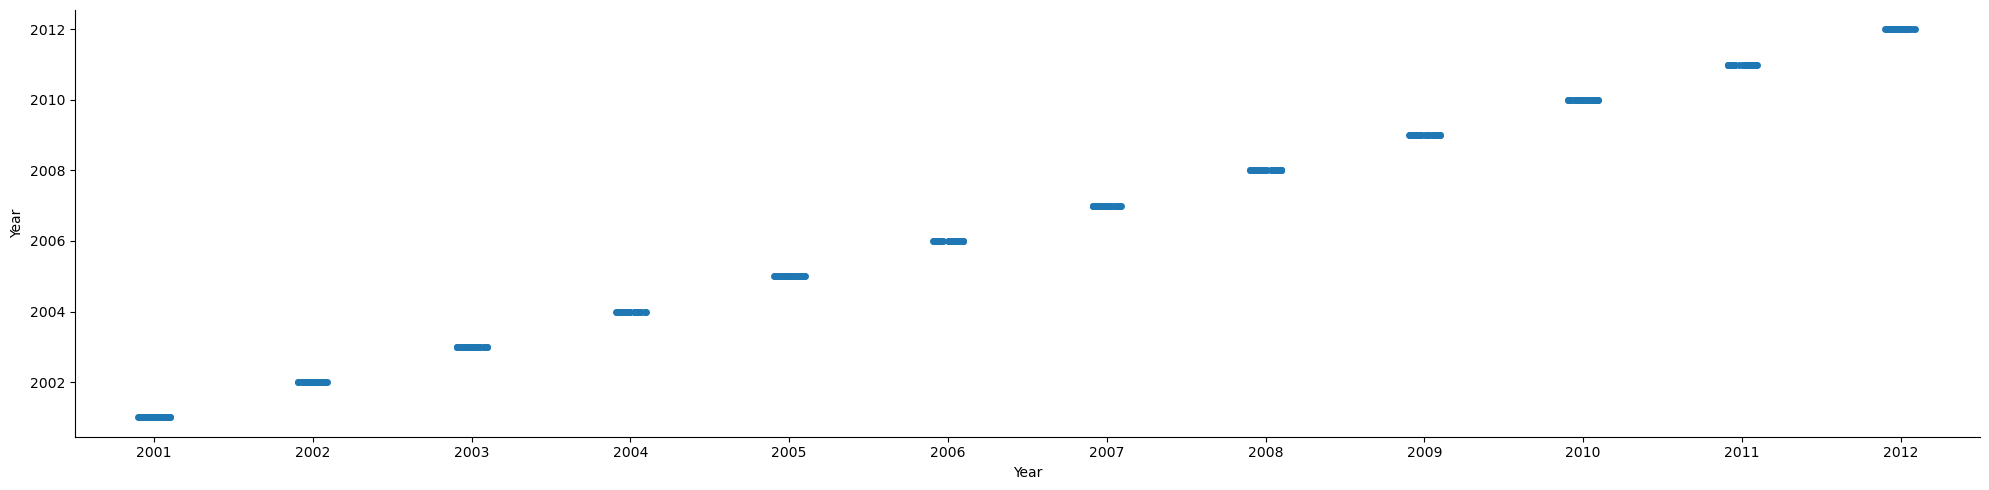

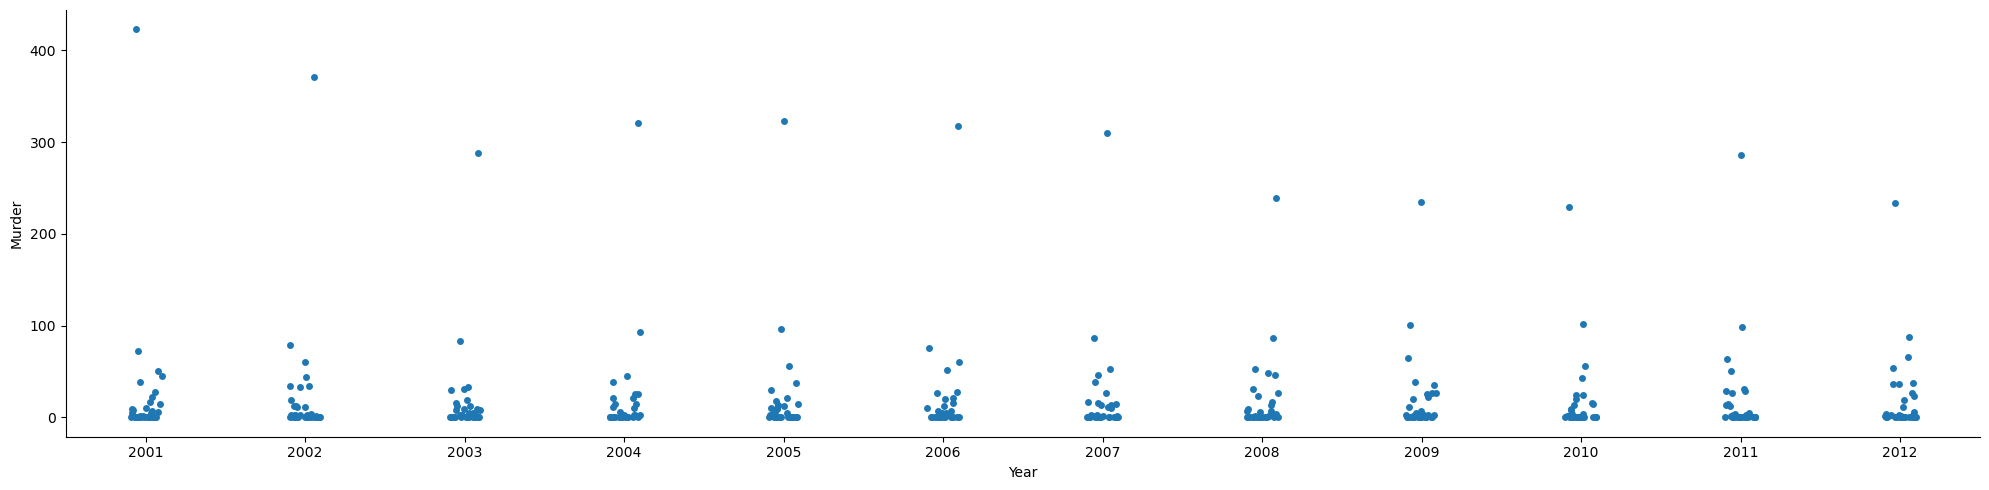

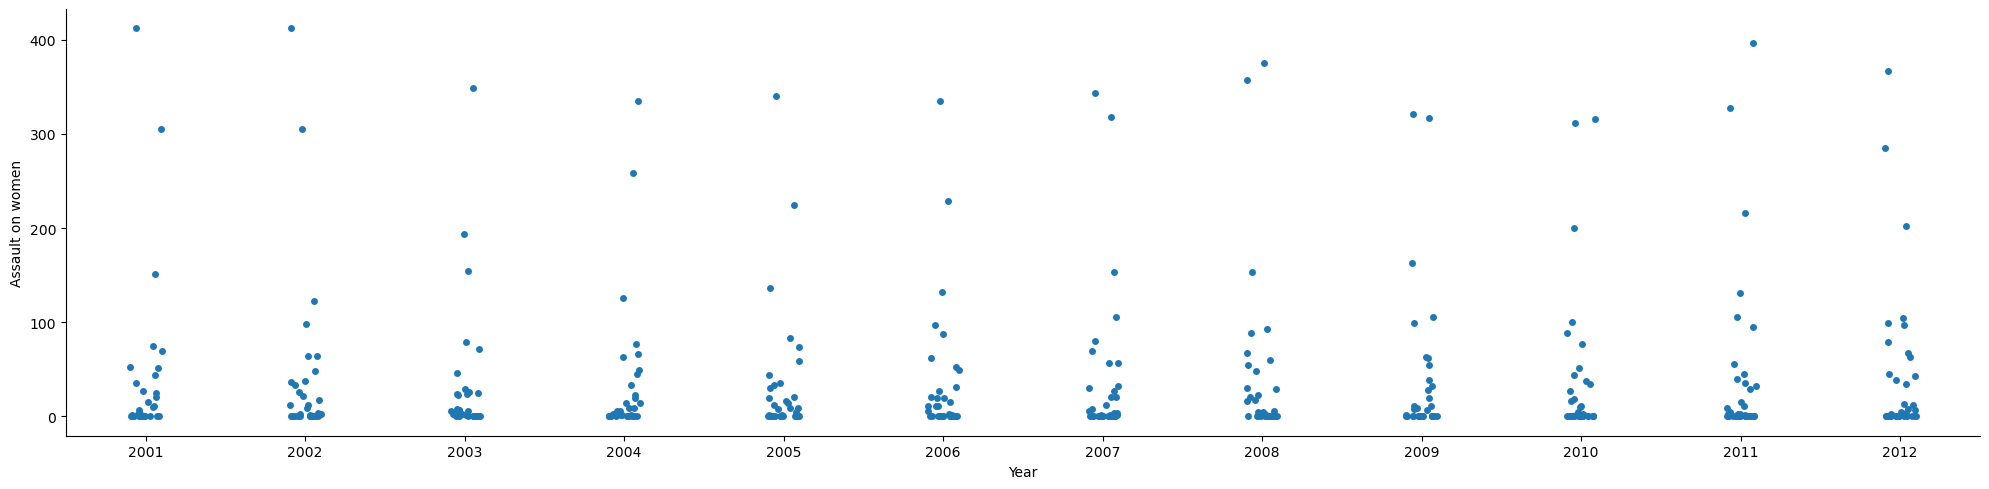

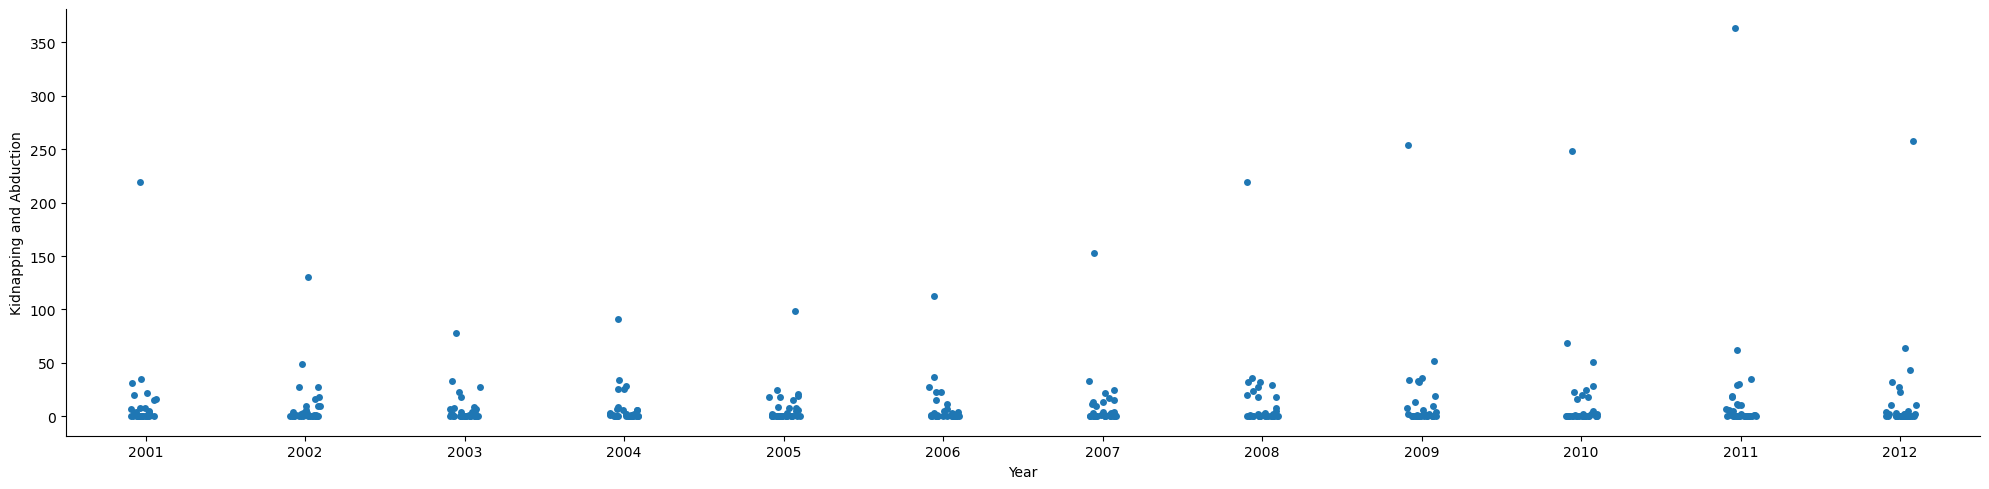

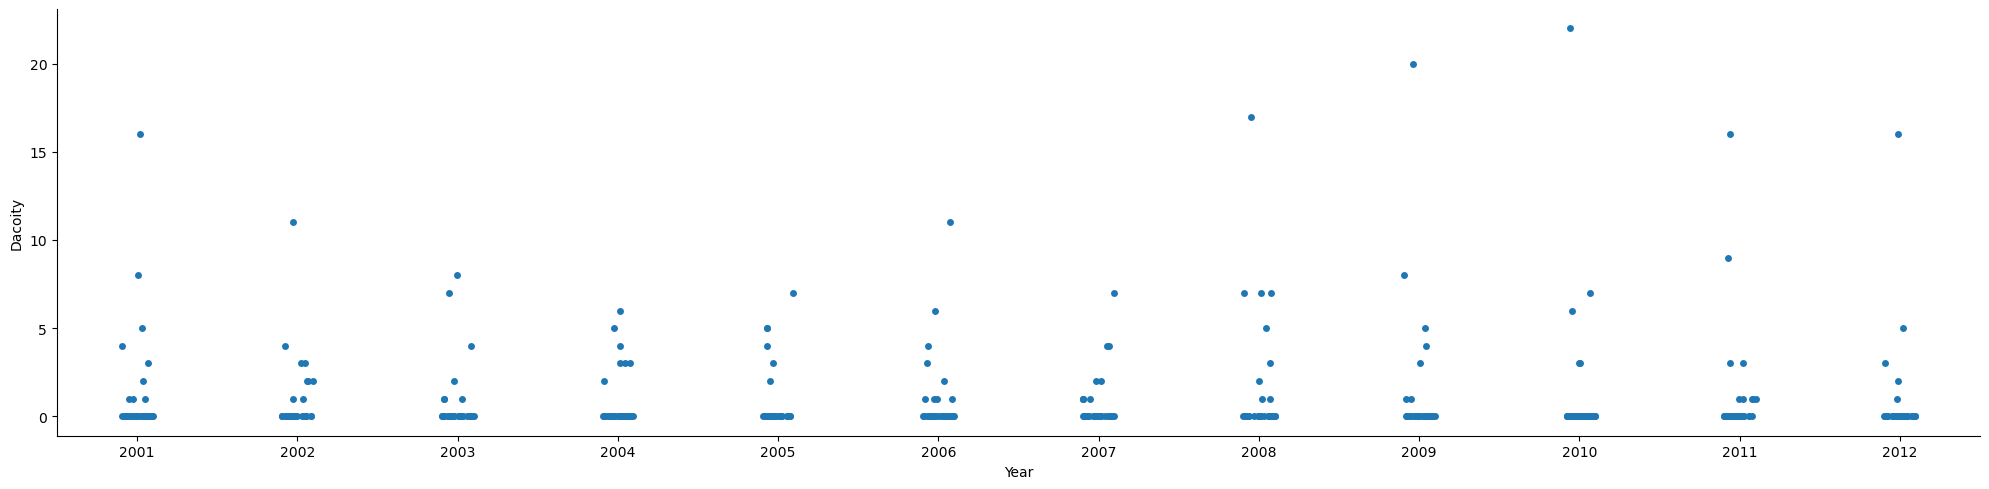

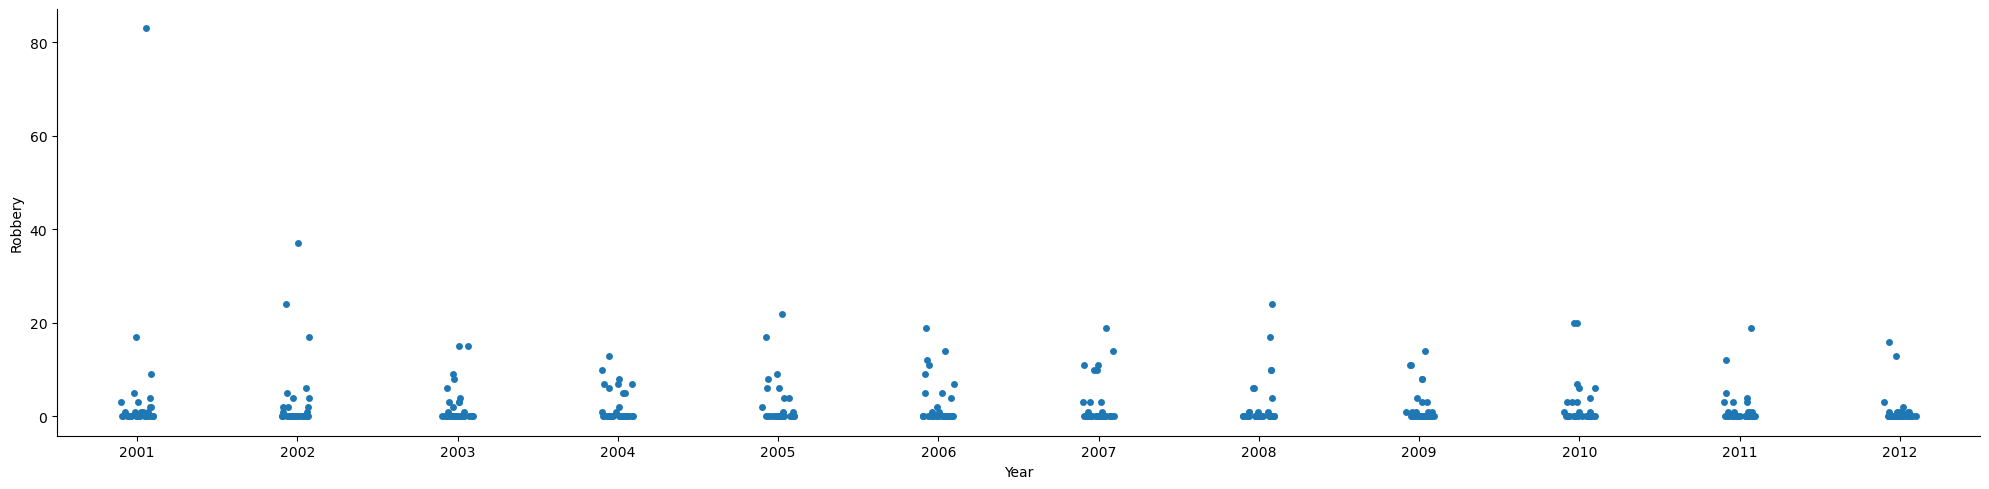

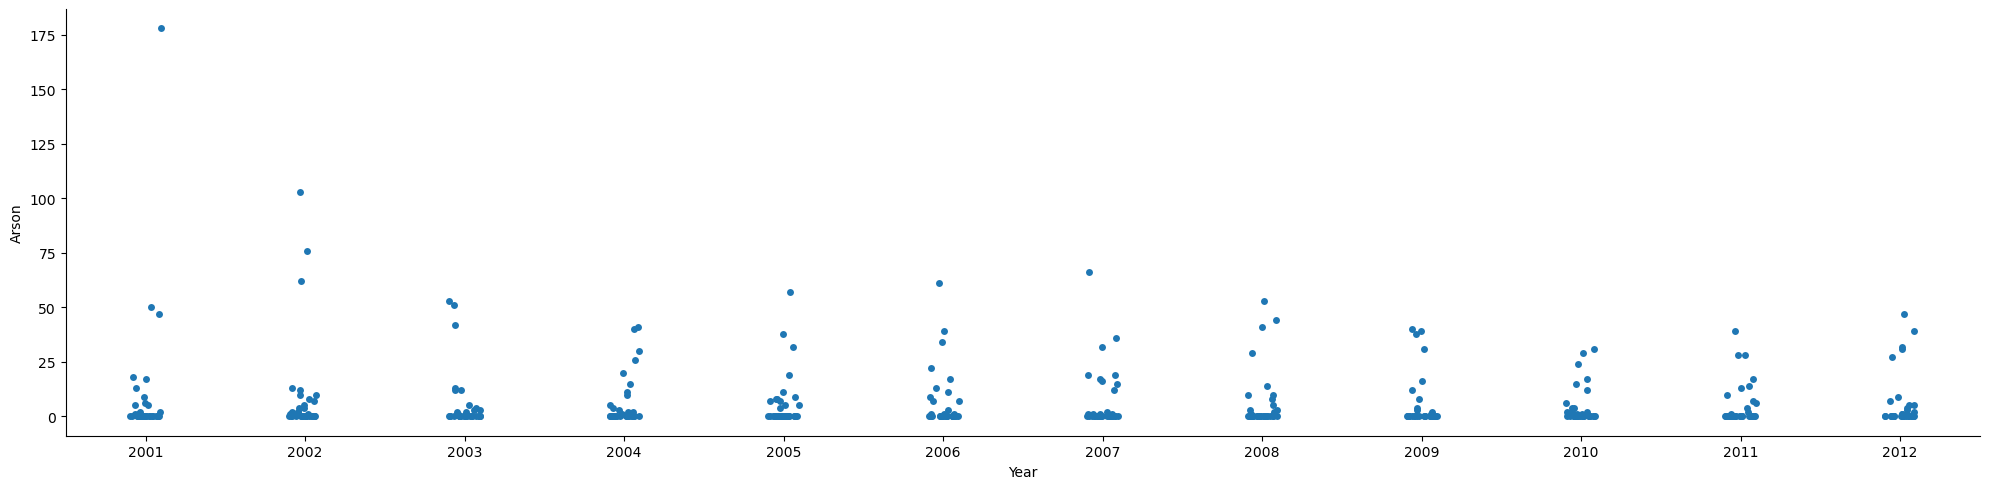

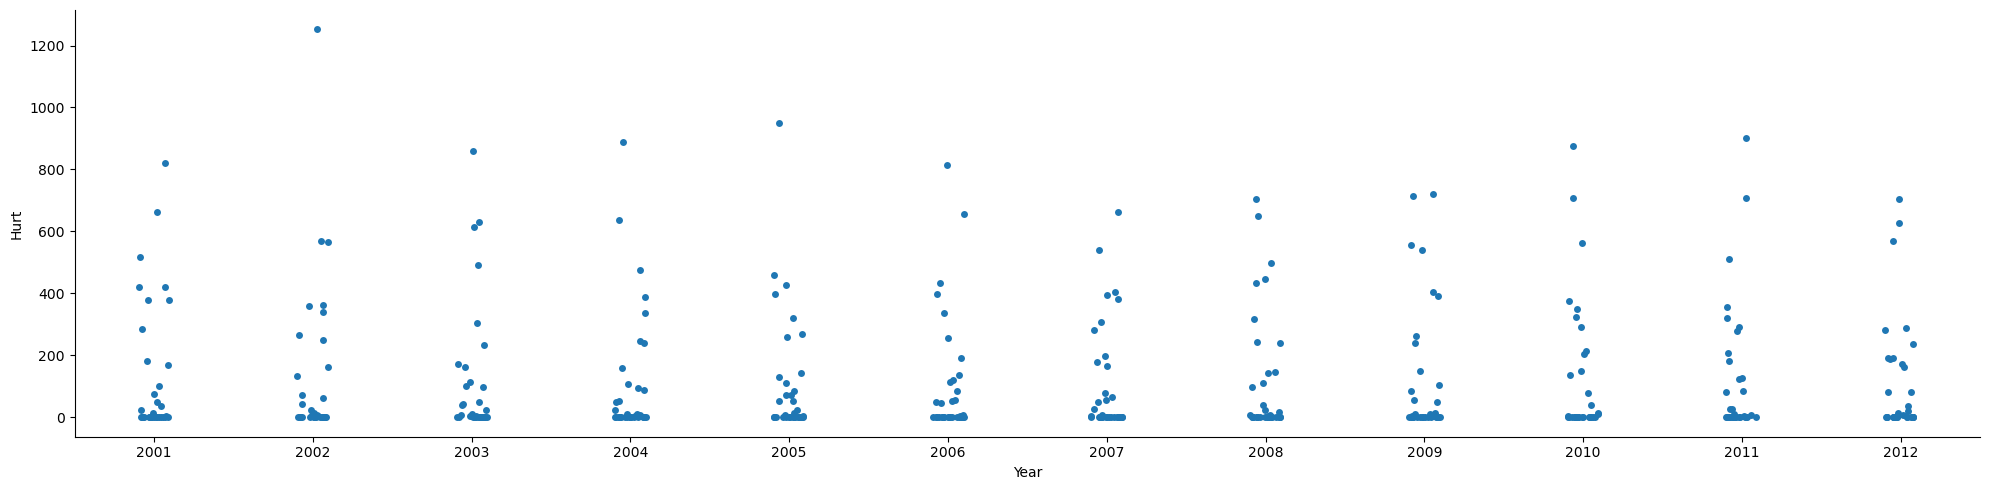

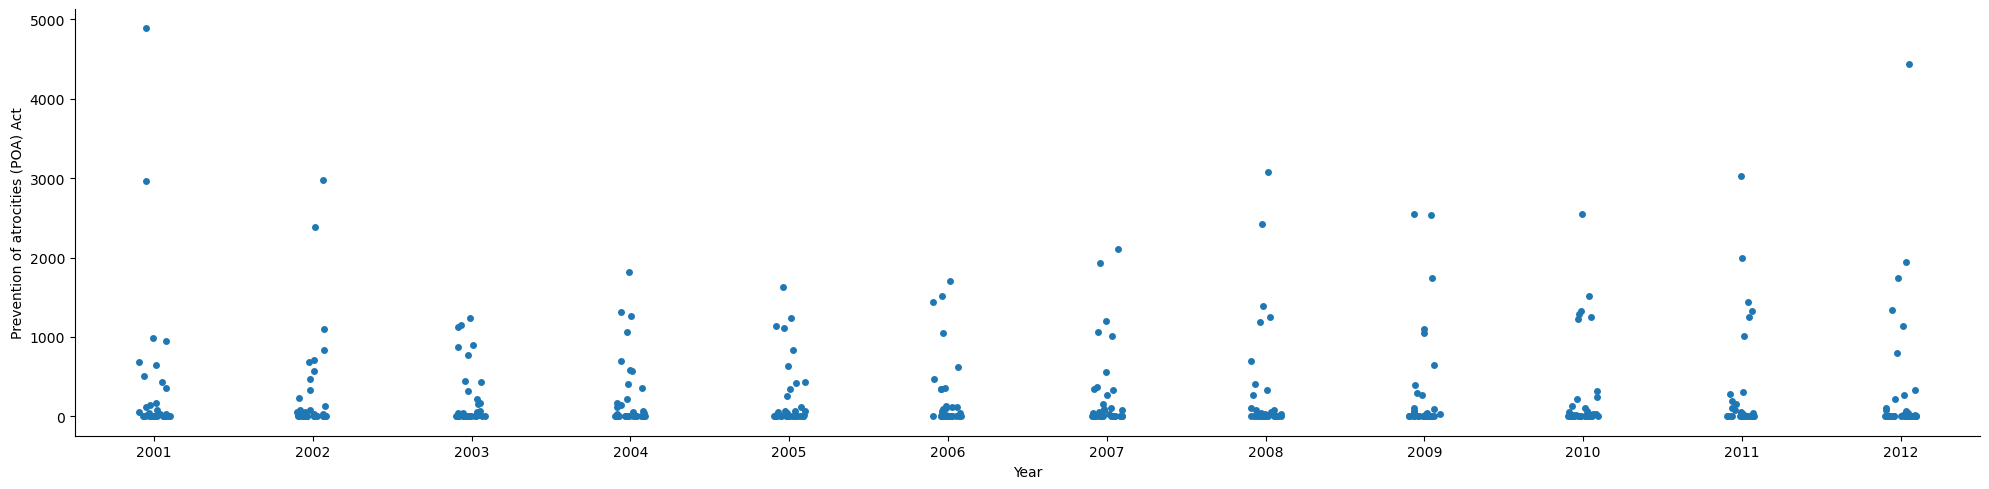

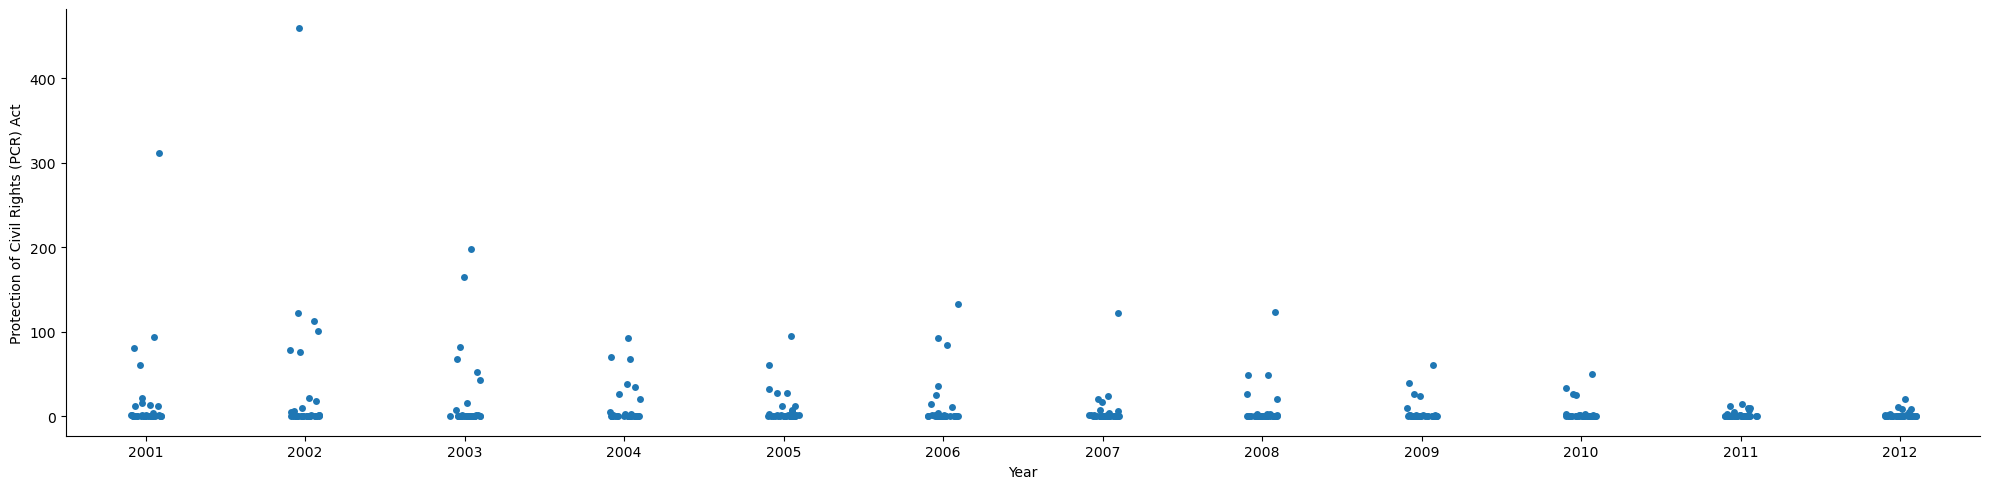

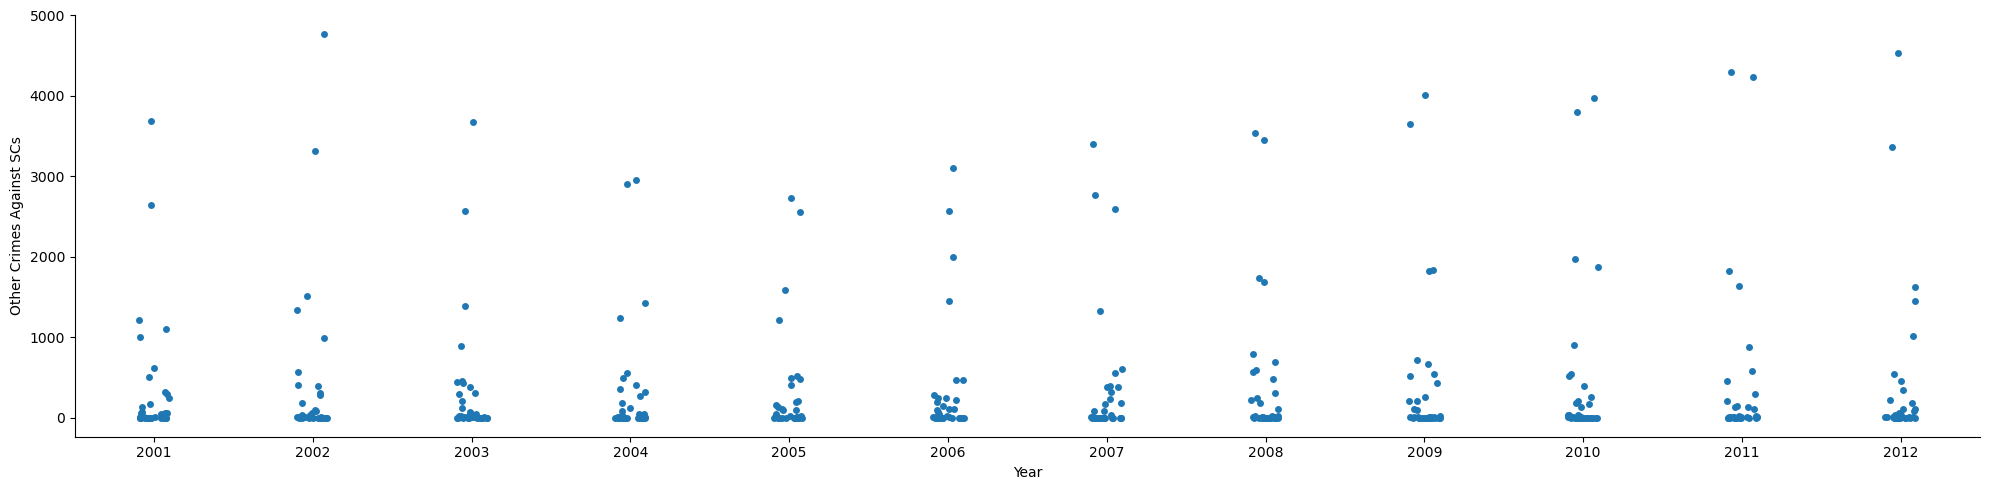

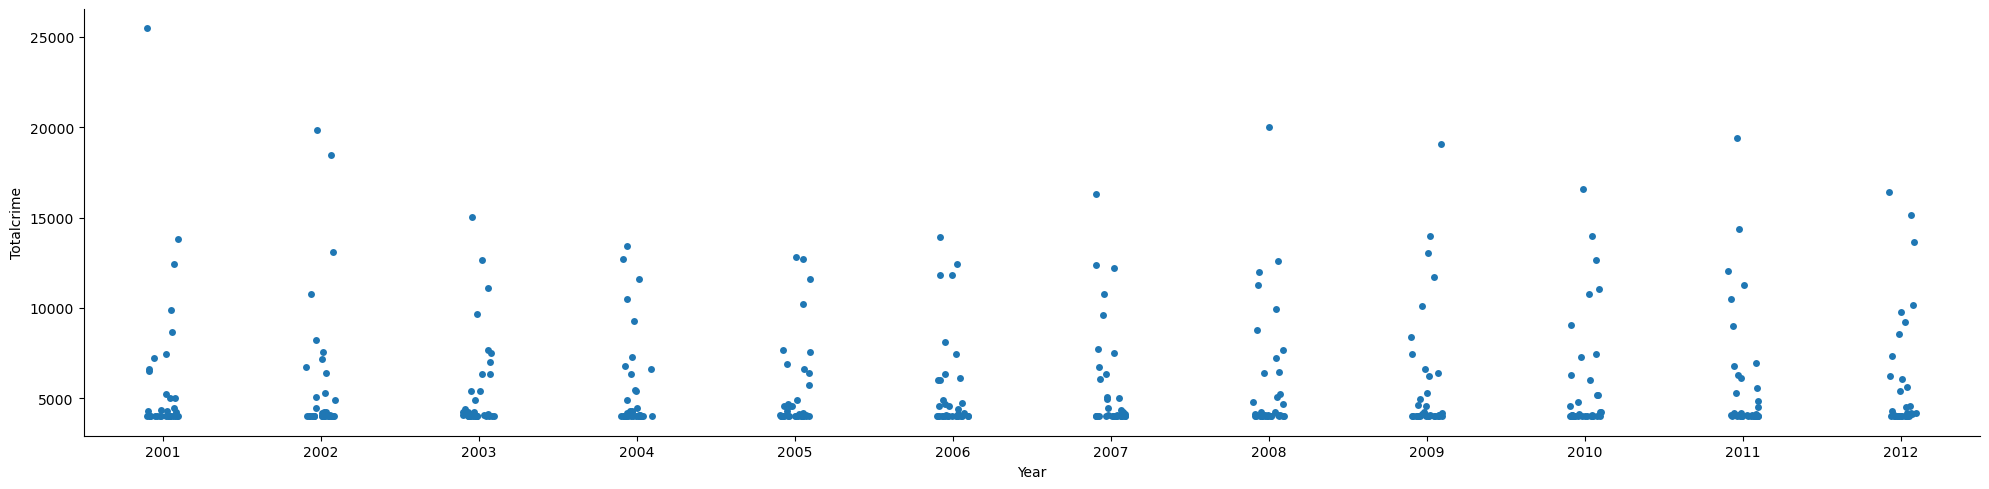

In [32]:
for i in df3:
  sns.catplot(x='Year', y=i, data=df ,height = 5, aspect = 4)

In [36]:
cbd = pd.read_csv('crime_by_district.csv')

In [37]:
cbd

STATE/UT       DISTRICT  Year  Murder  Assault on women  \
0     ANDHRA PRADESH       ADILABAD  2001       0                 1   
1     ANDHRA PRADESH      ANANTAPUR  2001       0                 4   
2     ANDHRA PRADESH       CHITTOOR  2001       3                 3   
3     ANDHRA PRADESH       CUDDAPAH  2001       0                 3   
4     ANDHRA PRADESH  EAST GODAVARI  2001       1                 3   
...              ...            ...   ...     ...               ...   
9836     Lakshadweep    LAKSHADWEEP  2013       0                 0   
9837     Lakshadweep          TOTAL  2013       0                 0   
9838      Puducherry       KARAIKAL  2013       0                 1   
9839      Puducherry     PUDUCHERRY  2013       0                 0   
9840      Puducherry          TOTAL  2013       0                 1   

      Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                            4        0        0      0     3   
1                            0        0        0      0    49   
2                            0        0        0      0    38   
3                            0        0        0      0    20   
4                            0        0        0      0     3   
...                        ...      ...      ...    ...   ...   
9836                         0        0        0      0     0   
9837                         0        0        0      0     0   
9838                         0        0        0      0     0   
9839                         0        0        0      0     0   
9840                         0        0        0      0     0   

      Prevention of atrocities (POA) Act  \
0                                      0   
1                                     21   
2                                     36   
3                                     52   
4                                     12   
...                                  ...   
9836                                   0   
9837                                   0   
9838                                   0   
9839                                   4   
9840                                   4   

      Protection of Civil Rights (PCR) Act  Other Crimes Against SCs  
0                                       15                        32  
1                                        0                        53  
2                                        0                        34  
3                                        0                        25  
4                                       63                         7  
...                                    ...                       ...  
9836                                     0                         0  
9837                                     0                         0  
9838                                     3                         0  
9839                                    12                         1  
9840                                    15                         1  

[9841 rows x 13 columns]

In [38]:
list(cbd.columns)

['STATE/UT',
 'DISTRICT',
 'Year',
 'Murder',
 'Assault on women',
 'Kidnapping and Abduction',
 'Dacoity',
 'Robbery',
 'Arson',
 'Hurt',
 'Prevention of atrocities (POA) Act',
 'Protection of Civil Rights (PCR) Act',
 'Other Crimes Against SCs']

In [39]:
cbd['STATE/UT'].unique()     

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY',
       'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A&N Islands', 'Chandigarh', 'D&N Haveli',
       '

In [40]:
cbd['DISTRICT'].unique()

array(['ADILABAD', 'ANANTAPUR', 'CHITTOOR', 'CUDDAPAH', 'EAST GODAVARI',
       'GUNTAKAL RLY.', 'GUNTUR', 'HYDERABAD CITY', 'KARIMNAGAR',
       'KHAMMAM', 'KRISHNA', 'KURNOOL', 'MAHABOOBNAGAR', 'MEDAK',
       'NALGONDA', 'NELLORE', 'NIZAMABAD', 'PRAKASHAM', 'RANGA REDDY',
       'SECUNDERABAD RLY.', 'SRIKAKULAM', 'VIJAYAWADA', 'VIJAYAWADA RLY.',
       'VISAKHA RURAL', 'VISAKHAPATNAM', 'VIZIANAGARAM', 'WARANGAL',
       'WEST GODAVARI', 'TOTAL', 'CHANGLANG', 'DIBANG VALLEY',
       'KAMENG EAST', 'KAMENG WEST', 'LOHIT', 'PAPUM PARE', 'SIANG EAST',
       'SIANG UPPER', 'SIANG WEST', 'SUBANSIRI LOWER', 'SUBANSIRI UPPER',
       'TAWANG', 'TIRAP', 'BARPETA', 'BONGAIGAON', 'C.I.D.', 'CACHAR',
       'DARRANG', 'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'G.R.P.', 'GOALPARA',
       'GOLAGHAT', 'GUWAHATI CITY', 'HAILAKANDI', 'JORHAT', 'KAMRUP',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MORIGAON',
       'N.C. HILLS', 'NAGAON', 'NALBARI', 'R.P.O.', 'SIBSAGAR',
       'SONITPU

In [41]:
droplist = ['TOTAL']
print(cbd.shape)
cbd = cbd[~cbd['DISTRICT'].isin(droplist)]
print(cbd.shape)
cbd['Totaldistrictcrime'] = cbd.drop(columns=['STATE/UT','Year','DISTRICT']).sum(axis=1)
cbd.head()     

(9841, 13)
(9385, 13)


C:\Users\chakr\AppData\Local\Temp\ipykernel_20004\952262410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbd['Totaldistrictcrime'] = cbd.drop(columns=['STATE/UT','Year','DISTRICT']).sum(axis=1)


STATE/UT       DISTRICT  Year  Murder  Assault on women  \
0  ANDHRA PRADESH       ADILABAD  2001       0                 1   
1  ANDHRA PRADESH      ANANTAPUR  2001       0                 4   
2  ANDHRA PRADESH       CHITTOOR  2001       3                 3   
3  ANDHRA PRADESH       CUDDAPAH  2001       0                 3   
4  ANDHRA PRADESH  EAST GODAVARI  2001       1                 3   

   Kidnapping and Abduction  Dacoity  Robbery  Arson  Hurt  \
0                         4        0        0      0     3   
1                         0        0        0      0    49   
2                         0        0        0      0    38   
3                         0        0        0      0    20   
4                         0        0        0      0     3   

   Prevention of atrocities (POA) Act  Protection of Civil Rights (PCR) Act  \
0                                   0                                    15   
1                                  21                                     0   
2                                  36                                     0   
3                                  52                                     0   
4                                  12                                    63   

   Other Crimes Against SCs  Totaldistrictcrime  
0                        32                  55  
1                        53                 127  
2                        34                 114  
3                        25                 100  
4                         7                  89

In [42]:

s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Totaldistrictcrime'].sum().reset_index().sort_values(by='Totaldistrictcrime',ascending=False)
s.head().style.background_gradient(cmap='Blues')


In [43]:
s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Murder'].sum().reset_index().sort_values(by='Murder',ascending=False)
s.head().style.background_gradient(cmap='Greens')

In [44]:

s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Assault on women'].sum().reset_index().sort_values(by='Assault on women',ascending=False)
s.head().style.background_gradient(cmap='Reds')

In [45]:

s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Kidnapping and Abduction'].sum().reset_index().sort_values(by='Kidnapping and Abduction',ascending=False)
s.head().style.background_gradient(cmap='Greys')
     

In [46]:

s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Dacoity'].sum().reset_index().sort_values(by='Dacoity',ascending=False)
s.head().style.background_gradient(cmap='RdPu')

In [47]:

s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Robbery'].sum().reset_index().sort_values(by='Robbery',ascending=False)
s.head().style.background_gradient(cmap='Purples')

In [48]:

s= cbd.groupby(['STATE/UT','DISTRICT','Year'])['Hurt'].sum().reset_index().sort_values(by='Hurt',ascending=False)
s.head().style.background_gradient(cmap='Oranges')

In [49]:

district_serious = pd.DataFrame(cbd.groupby('DISTRICT')['Murder','Assault on women',
                                                       'Kidnapping and Abduction'].sum())
district_serious['Total'] = district_serious.sum(axis = 1, skipna = True) 
district_serious = district_serious.sort_values('Total', ascending=False)
district_serious.reset_index(inplace=True)
district_serious = district_serious.head(10)
     

C:\Users\chakr\AppData\Local\Temp\ipykernel_20004\2357911955.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  district_serious = pd.DataFrame(cbd.groupby('DISTRICT')['Murder','Assault on women',


In [50]:

fig = px.bar(district_serious, x="Total", y="DISTRICT", color='DISTRICT', orientation='h')
fig.show()

In [53]:

for i in df3:
  fig = px.scatter(df, x="STATE/UT", y=i,animation_frame="Year",size=i,color=i)
  fig.show()
     